# Importing Dependencies & Fashion-MNIST Dataset

In [ ]:
pip install tensorflow==2.8.4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 498.1/498.1 MB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 22.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.3/462.3 kB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 47.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 33.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 34.3 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.15.0
    Uninstalling tensorflow-estimator-2.15.0:
      Successfully uninstalled tensorflow-estimator-2.15.0
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.

In [ ]:
import numpy as np # For numerical computations
import pandas as pd # For dataframe operations

# Importing Matplotlib and seaborn for Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

import math # for mathematical calculations

# All tensorflow utilities for creating, training and working with a CNN.
import tensorflow as tf # (version 2.8.4)
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout,BatchNormalization
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

# For evaluation matrices for comparative analysis
from sklearn.metrics import classification_report, confusion_matrix


# Loading & Splitting Data

In [ ]:
# Loading the dataset and splitting to train and test
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


# Exploratory Data Analysis

In [ ]:
# Train images are of 60000 images
train_images.shape

(60000, 28, 28)

In [ ]:
# Test images are of 10000 images
test_images.shape

(10000, 28, 28)

In [ ]:
train_images[0].shape

(28, 28)

In [ ]:
# Dataset information
num_train_samples = train_images.shape[0]
num_test_samples = test_images.shape[0]
image_shape = train_images.shape[1:]

print(f"Number of Training Samples: {num_train_samples}")
print(f"Number of Test Samples: {num_test_samples}")
print(f"Image Shape: {image_shape}")

Number of Training Samples: 60000
Number of Test Samples: 10000
Image Shape: (28, 28)


In [ ]:
# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.

    Parameters:
    - y_true: True labels
    - y_pred: Predicted labels
    - class_names: Class labels
    - normalize: To normalize the confusion matrix
    - title: Title of the plot
    - cmap: Colormap for the heatmap

    Returns:
    - None
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Plot
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, cbar=True)

    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(title)
    plt.xticks(np.arange(len(classes))+0.5, classes, rotation=45)
    plt.yticks(np.arange(len(classes))+0.5, classes)
    plt.tight_layout()
    plt.show() # Show the plot

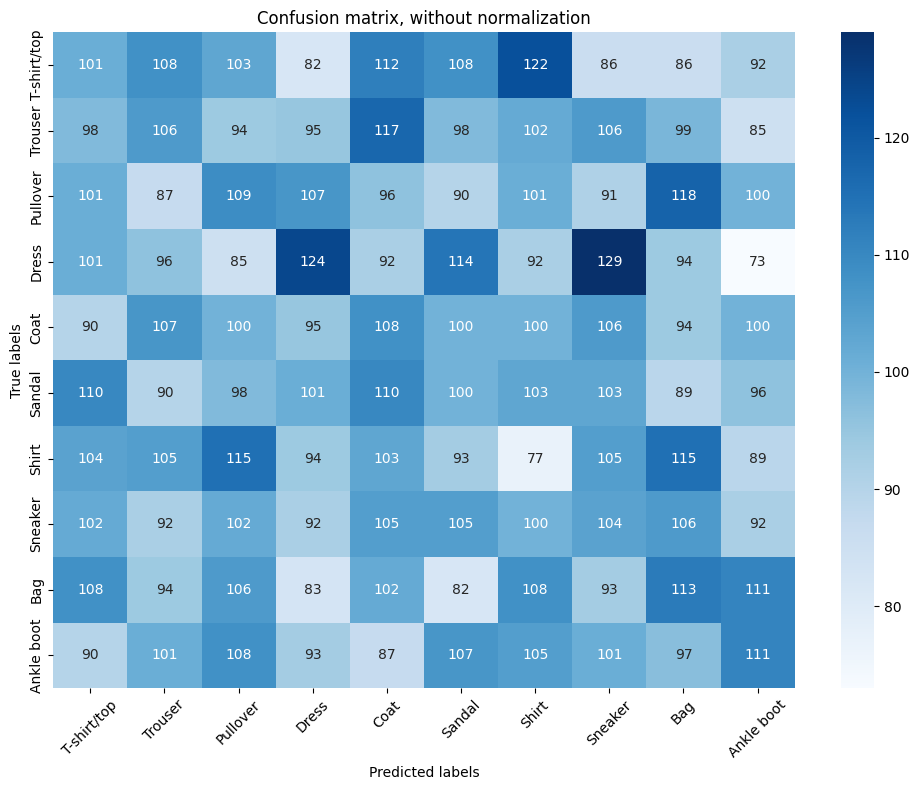

In [ ]:
# Assigning test_labels from the test dataset to y_true
y_true = test_labels

# Creating random predictions between the numbers 0 and 9 for each item in the test dataset
y_pred = np.random.randint(0, 10, size=len(test_labels))

# Define class labels
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Plotting the confusion matrix using the function plot_confusion_matrix defined above
plot_confusion_matrix(y_true, y_pred, classes=class_names)

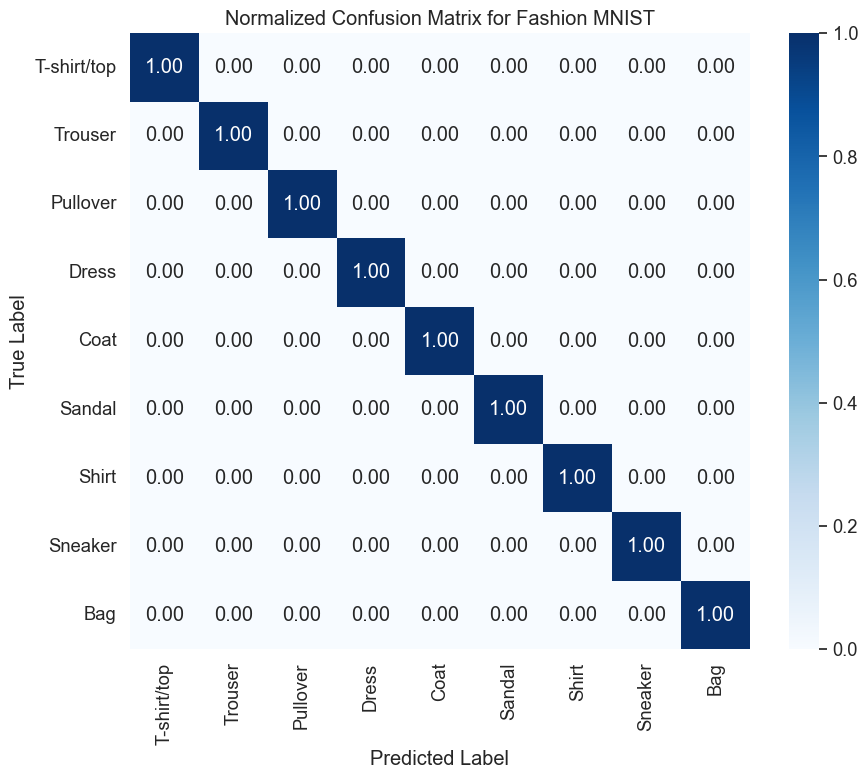

In [ ]:
# Existing labels and predicted labels
y_true = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8])
y_pred = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8])

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Normalize confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Define class labels
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag']

# Create confusion matrix plot
plt.figure(figsize=(10, 8))
sns.set(font_scale=1.2)  # for label size
sns.heatmap(cm_normalized, annot=True, cmap='Blues', fmt='.2f', xticklabels=classes, yticklabels=classes)
plt.title('Normalized Confusion Matrix for Fashion MNIST')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show() # Show the plot


## Functions for model evaluation

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
# Defining function for plotting confusion matrix and classification report for
# all the models
def confMat_clfReport(y_true, y_pred, class_names):
    """
    This function computes and plots the confusion matrix and prints the classification report.

    Parameters:
    - y_true: True labels
    - y_pred: Predicted labels
    - class_names: Class labels

    Returns:
    - None
    """

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    # Plot confusion matrix
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    sns.heatmap(cm_normalized, annot=True, fmt='.2f', xticklabels=class_names, yticklabels=class_names)
    plt.title('Normalized Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

    # Compute and print classification report
    report = classification_report(y_true, y_pred, target_names=class_names)

    plt.subplot(1, 2, 2)
    plt.text(0.5, 0.5, report, ha='center', va='center', fontsize=12)
    plt.axis('off')

    plt.tight_layout()
    plt.show() # Show the plot


In [ ]:
# Plot metrix for loss and accuracy of a specific model
def plot_metrics(history, model_name):
    """
    This function plots the epochs vs. training and testing loss,
    and epochs vs. training and testing accuracy for a given model.

    Parameters:
    - history: Training history of the model
    - model_name: Name of the model

    Returns:
    - None
    """

    # Plotting Loss
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss', color='blue')
    plt.plot(history.history['val_loss'], label='Testing Loss', color='red')
    plt.title(f'{model_name} Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plotting Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
    plt.plot(history.history['val_accuracy'], label='Testing Accuracy', color='red')
    plt.title(f'{model_name} Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show() # Show the plot


# Dataset Visualization & Preprocessing

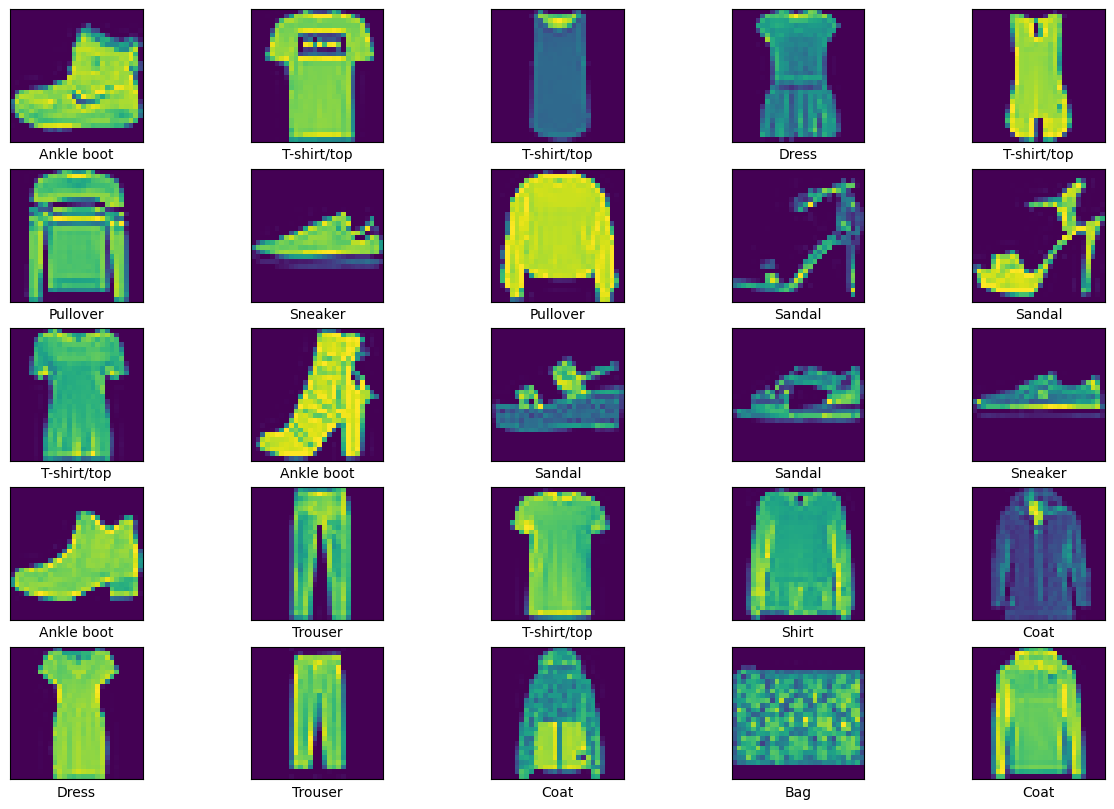

In [ ]:
# Define class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Plot the first 25 images from the training dataset
plt.figure(figsize=(15, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i]])
plt.show() # Show the plot

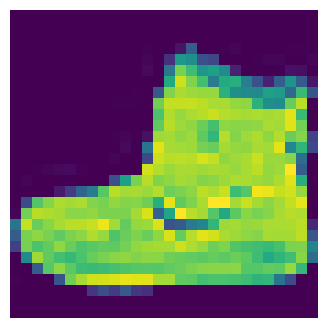

In [ ]:
#Visualizing a randomly selected single image
# Set the figure size and DPI
plt.rcParams['figure.figsize'] = (4, 4)  # Set figure size to 4x4 inches
plt.rcParams['figure.dpi'] = 100  # Set DPI to 100

# Display an image
plt.imshow(train_images[0])
plt.axis('off')  # Turn off axis
plt.show() # Show the plot

In [ ]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
# 0 to 255 pixel values. So we need to bring values of pixels between
# 0 and 1 so that the convergence is faster as we bring values to similar range
#and weights are easier

# Now we will Neural network architecture so that when we pass the data it understands the digit based on the pixel value
# o to 255 deivide each by 255 so we get all pixel values in the range of 0 to 1

# So dividing train and test split by 255
train_images=train_images/255
test_images=test_images/255

# Simple CNN Model

In [ ]:
#Building our CNN - Keras Sequential model and add layers to it

#now we need to flatten the 28 * 28 array
#Flattn array - in Keras
#from tensorflow.keras.layers import Dense,Flatten already imported
# Define the simple CNN model
model_cnn_simple = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

In [ ]:
# Compile the simple CNN model
model_cnn_simple.compile(optimizer='adam',
                          loss='sparse_categorical_crossentropy',
                          metrics=['accuracy'])

In [ ]:
model_cnn_simple.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 128)               692352    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
__________________________________________________

In [ ]:
# Training the simple CNN model on the training data that is created.
history_simple_cnn=model_cnn_simple.fit(train_images,train_labels,epochs=10,batch_size=32,validation_split=0.2)
history_simple_cnn

Epoch 1/10
1500/1500 [==============================] - 34s 23ms/step - loss: 0.9084 - accuracy: 0.8436 - val_loss: 0.3468 - val_accuracy: 0.8801
Epoch 2/10
1500/1500 [==============================] - 34s 23ms/step - loss: 0.2897 - accuracy: 0.8952 - val_loss: 0.3243 - val_accuracy: 0.8868
Epoch 3/10
1500/1500 [==============================] - 32s 22ms/step - loss: 0.2450 - accuracy: 0.9100 - val_loss: 0.3132 - val_accuracy: 0.8916
Epoch 4/10
1500/1500 [==============================] - 33s 22ms/step - loss: 0.2248 - accuracy: 0.9166 - val_loss: 0.3380 - val_accuracy: 0.8882
Epoch 5/10
1500/1500 [==============================] - 37s 25ms/step - loss: 0.2026 - accuracy: 0.9244 - val_loss: 0.3252 - val_accuracy: 0.8963
Epoch 6/10
1500/1500 [==============================] - 32s 22ms/step - loss: 0.1854 - accuracy: 0.9310 - val_loss: 0.3649 - val_accuracy: 0.8858
Epoch 7/10
1500/1500 [==============================] - 34s 22ms/step - loss: 0.1721 - accuracy: 0.9350 - val_loss: 0.3575 -

## Model Evaluation

In [ ]:
# Evaluate the model on the test data
test_loss, test_accuracy = model_cnn_simple.evaluate(test_images, test_labels)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

313/313 [==============================] - 6s 18ms/step - loss: 0.4808 - accuracy: 0.8875
Test Accuracy: 88.75%


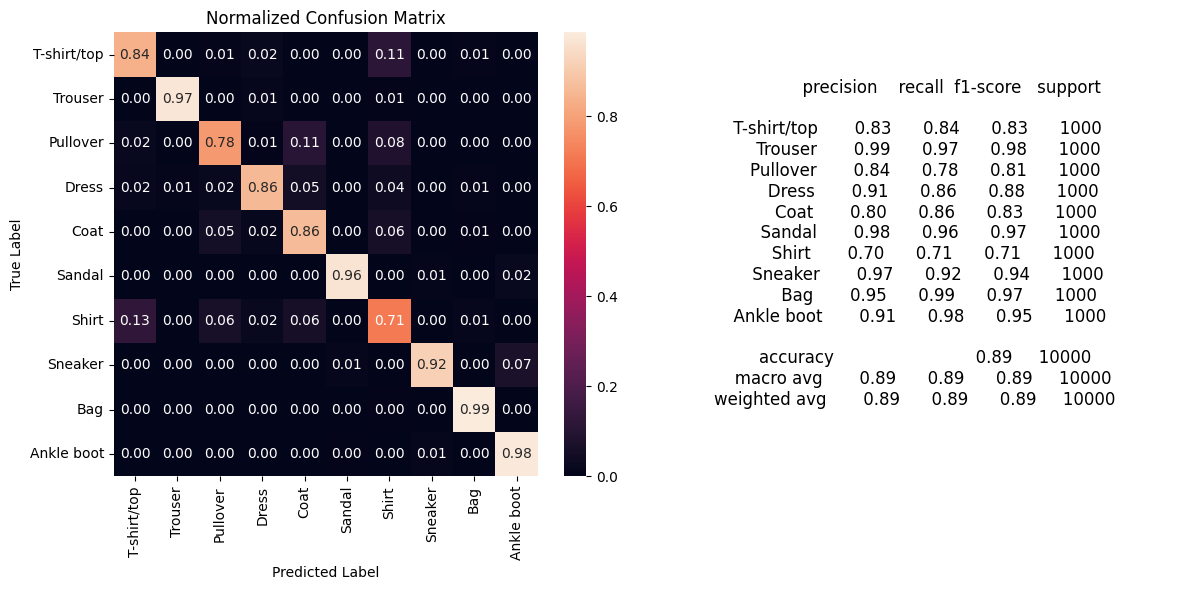

In [ ]:
# Evaluate Simple CNN Model
# Predictions for Simple CNN Model
y_pred_simple_cnn = np.argmax(model_cnn_simple.predict(test_images), axis=-1)
confMat_clfReport(test_labels, y_pred_simple_cnn, class_names)

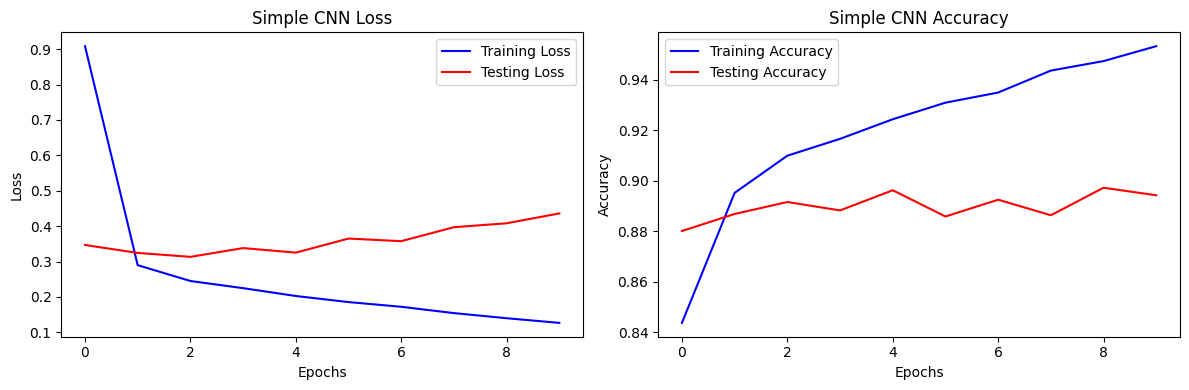

In [ ]:
# Plot metrics for Simple CNN Model
plot_metrics(history_simple_cnn, 'Simple CNN')

## Prediction

In [ ]:
# visualize with 2x5 grid
plt.rcParams['figure.figsize'] = (5,5)
plt.rcParams['figure.dpi'] = 100

digits = np.unique(train_labels)
digits = [int(x) for x in digits]
digits.sort()
digits

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

<ipython-input-20-5478c12f3682>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 5, i + 1)  # Create subplot


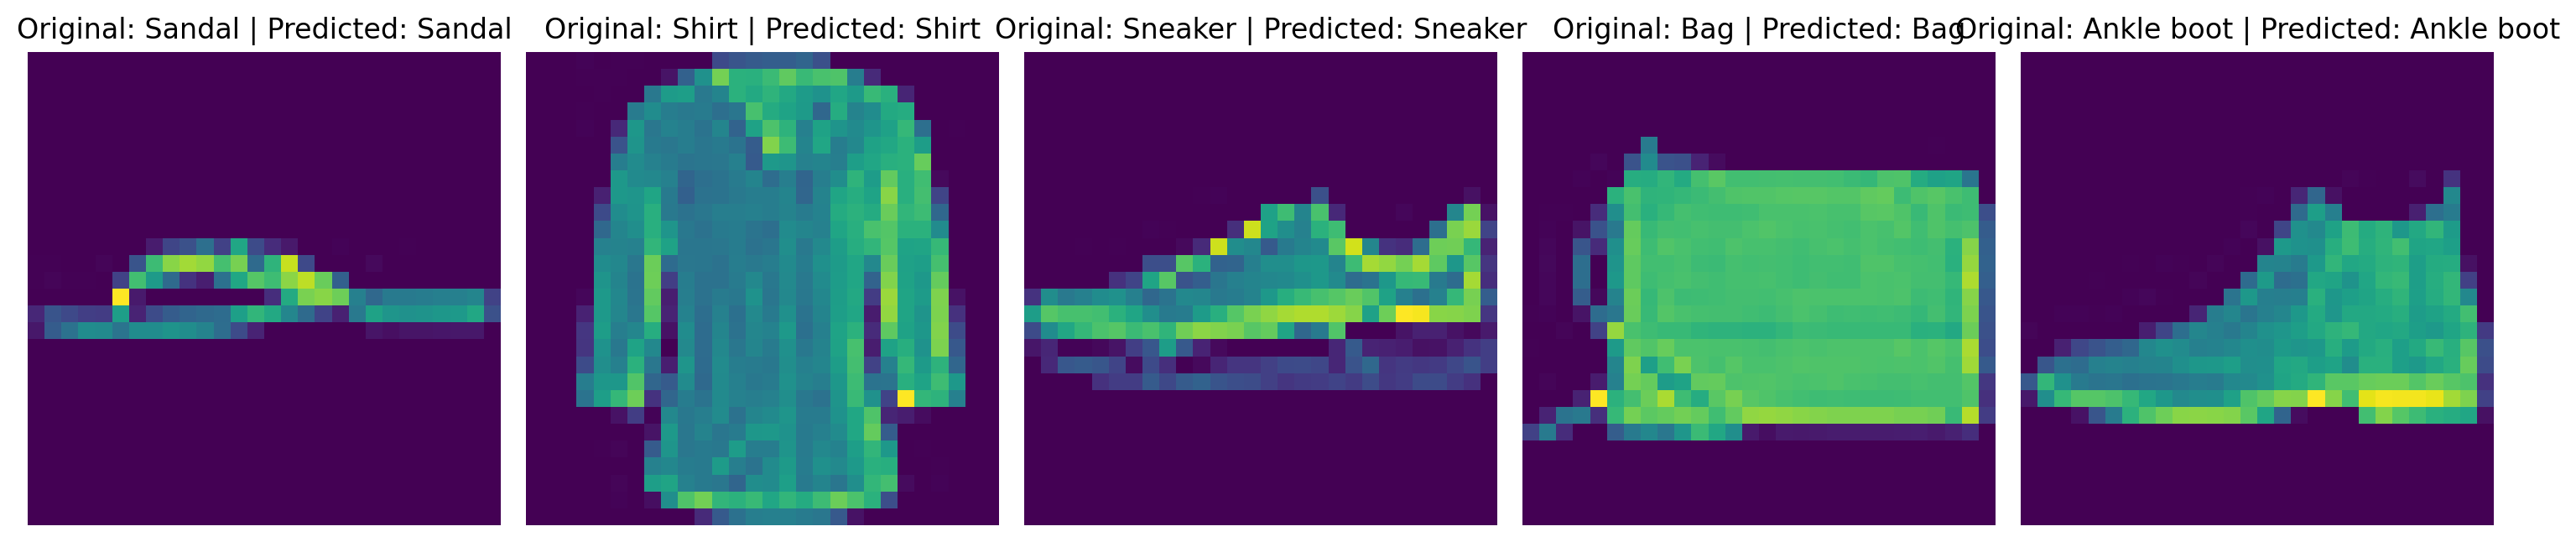

In [ ]:
plt.rcParams['figure.figsize'] = (15,15)
plt.rcParams['figure.dpi'] = 200
# Loop through each unique digit
for i in digits:
    plt.subplot(2, 5, i + 1)  # Create subplot
    test = test_images[test_labels == i][0]  # Select the first image of the current digit
    plt.imshow(test.reshape(28, 28))  # Display the image
    pred = model_cnn_simple.predict(test.reshape(1, 28, 28, 1))  # Make prediction
    idx = np.argmax(pred[0])  # Get the predicted class index
    pred_class = class_names[idx]  # Get the predicted class name
    plt.title('Original: {} | Predicted: {}'.format(class_names[i], pred_class))  # Set title
    plt.axis('off')  # Turn off axis
    plt.tight_layout()  # Adjust layout

plt.show()  # Show the plot


In [ ]:
# Reshape the image for prediction
prediction_input = test_images[0].reshape(1, 28, 28, 1)

# Make prediction
pred_simple = model_cnn_simple.predict(prediction_input)

# Get the predicted class index
predicted_class_index = np.argmax(pred_simple)

# Get the predicted class label
predicted_class_label = class_names[predicted_class_index]

print(f"Predicted class index: {predicted_class_index}")
print(f"Predicted class label: {predicted_class_label}")


Predicted class index: 9
Predicted class label: Ankle boot


# Learning Rate Scheduled CNN Model

In [ ]:
def lr_schedule(epoch):
    """
    This function adjusts the learning rate based on the epoch number

    Parameters:
    - epoch: Current epoch number

    Returns:
    - lr: Adjusted learning rate for the current epoch
    """
    # Initial learning rate
    initial_lr = 0.001

    # Learning rate drop rate
    drop = 0.5

    # Number of epochs after which the learning rate drops
    epochs_drop = 5.0

    # Computing the adjusted learning rate using the above factors
    lr = initial_lr * math.pow(drop, math.floor((1+epoch)/epochs_drop))

    return lr

# Create a LearningRateScheduler callback
lr_scheduler = LearningRateScheduler(lr_schedule)

In [ ]:
# Define the CNN model
model_cnn_lr = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

In [ ]:
# Compile the CNN model
model_cnn_lr.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# Train the model with learning rate scheduling
history_lr = model_cnn_lr.fit(train_images, train_labels,
                        epochs=20,
                        batch_size=32,
                        validation_data=(test_images, test_labels),
                        callbacks=[lr_scheduler])

Epoch 1/20
1875/1875 [==============================] - 44s 23ms/step - loss: 0.8972 - accuracy: 0.8467 - val_loss: 0.3482 - val_accuracy: 0.8747 - lr: 0.0010
Epoch 2/20
1875/1875 [==============================] - 40s 21ms/step - loss: 0.2920 - accuracy: 0.8949 - val_loss: 0.3853 - val_accuracy: 0.8622 - lr: 0.0010
Epoch 3/20
1875/1875 [==============================] - 44s 23ms/step - loss: 0.2588 - accuracy: 0.9056 - val_loss: 0.3296 - val_accuracy: 0.8877 - lr: 0.0010
Epoch 4/20
1875/1875 [==============================] - 41s 22ms/step - loss: 0.2336 - accuracy: 0.9146 - val_loss: 0.3527 - val_accuracy: 0.8887 - lr: 0.0010
Epoch 5/20
1875/1875 [==============================] - 42s 23ms/step - loss: 0.1770 - accuracy: 0.9341 - val_loss: 0.3152 - val_accuracy: 0.8990 - lr: 5.0000e-04
Epoch 6/20
1875/1875 [==============================] - 44s 24ms/step - loss: 0.1529 - accuracy: 0.9420 - val_loss: 0.3399 - val_accuracy: 0.8972 - lr: 5.0000e-04
Epoch 7/20
1875/1875 [================

## Model Evalution

In [ ]:
# Evaluate the model on the test data
test_loss, test_accuracy = model_cnn_lr.evaluate(test_images, test_labels)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

313/313 [==============================] - 2s 7ms/step - loss: 0.7448 - accuracy: 0.9010
Test Accuracy: 90.10%


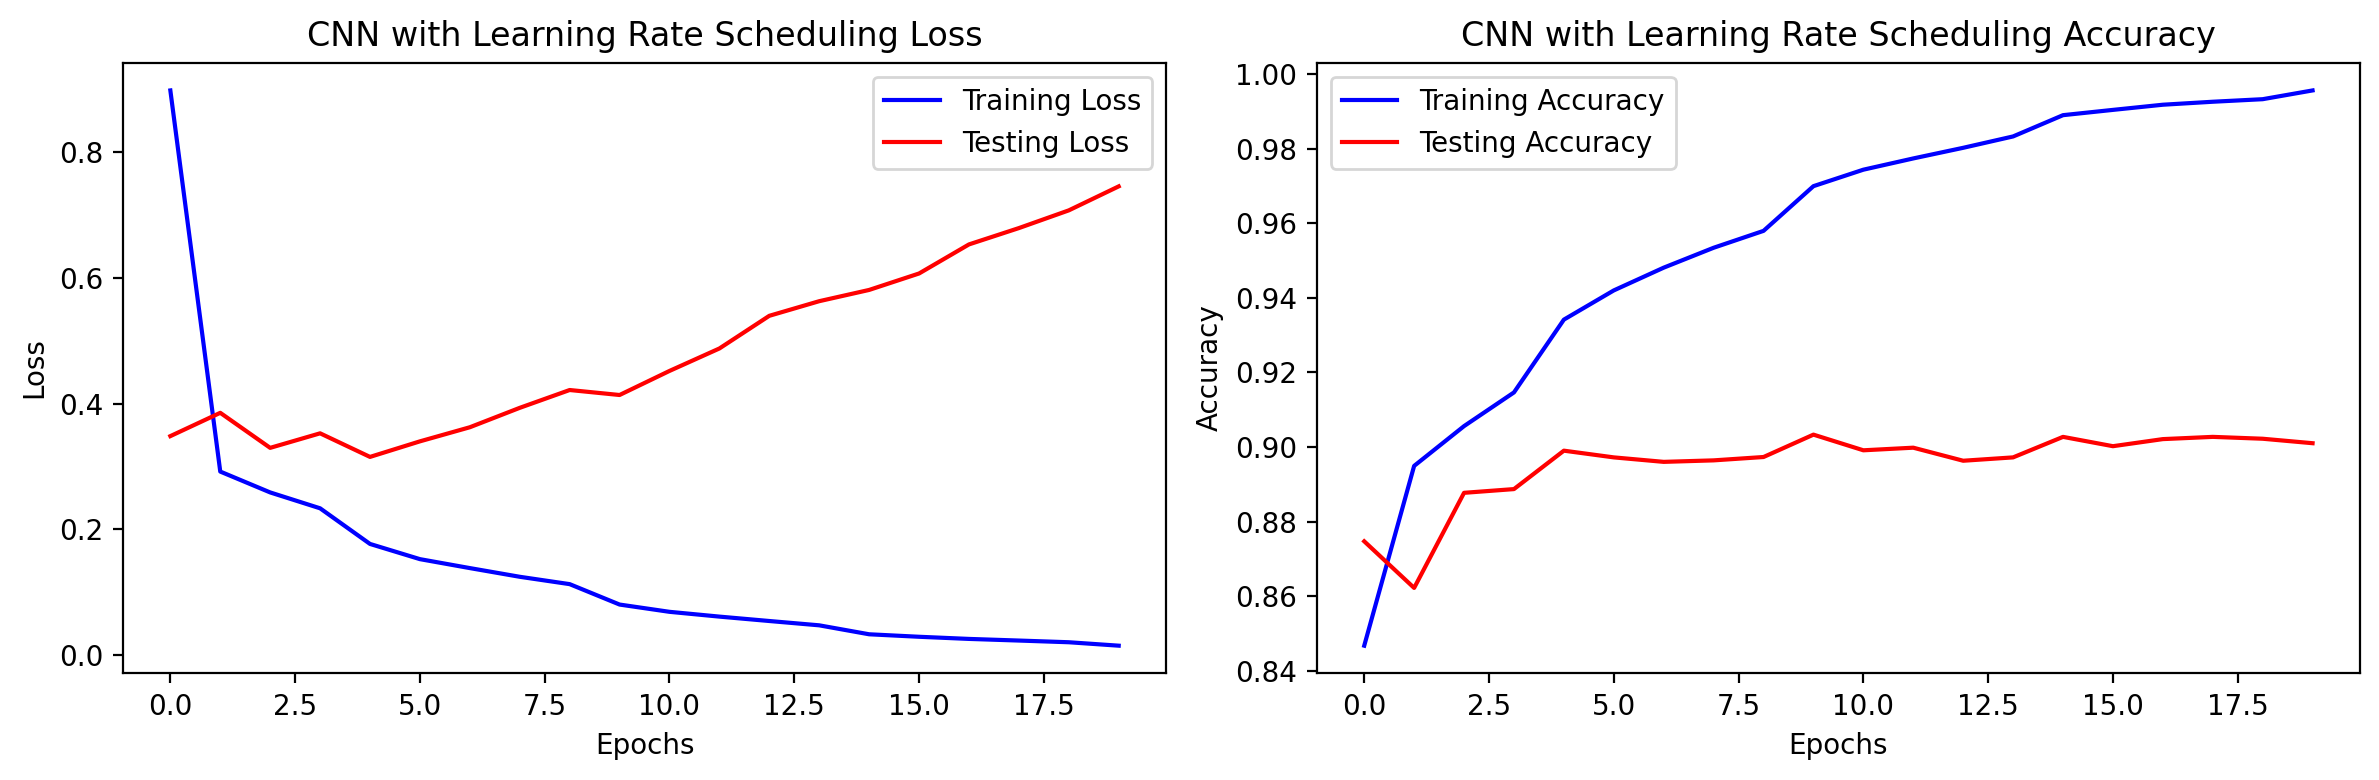

In [ ]:
# Plot metrics for Simple CNN Model
plot_metrics(history_lr, 'CNN with Learning Rate Scheduling')

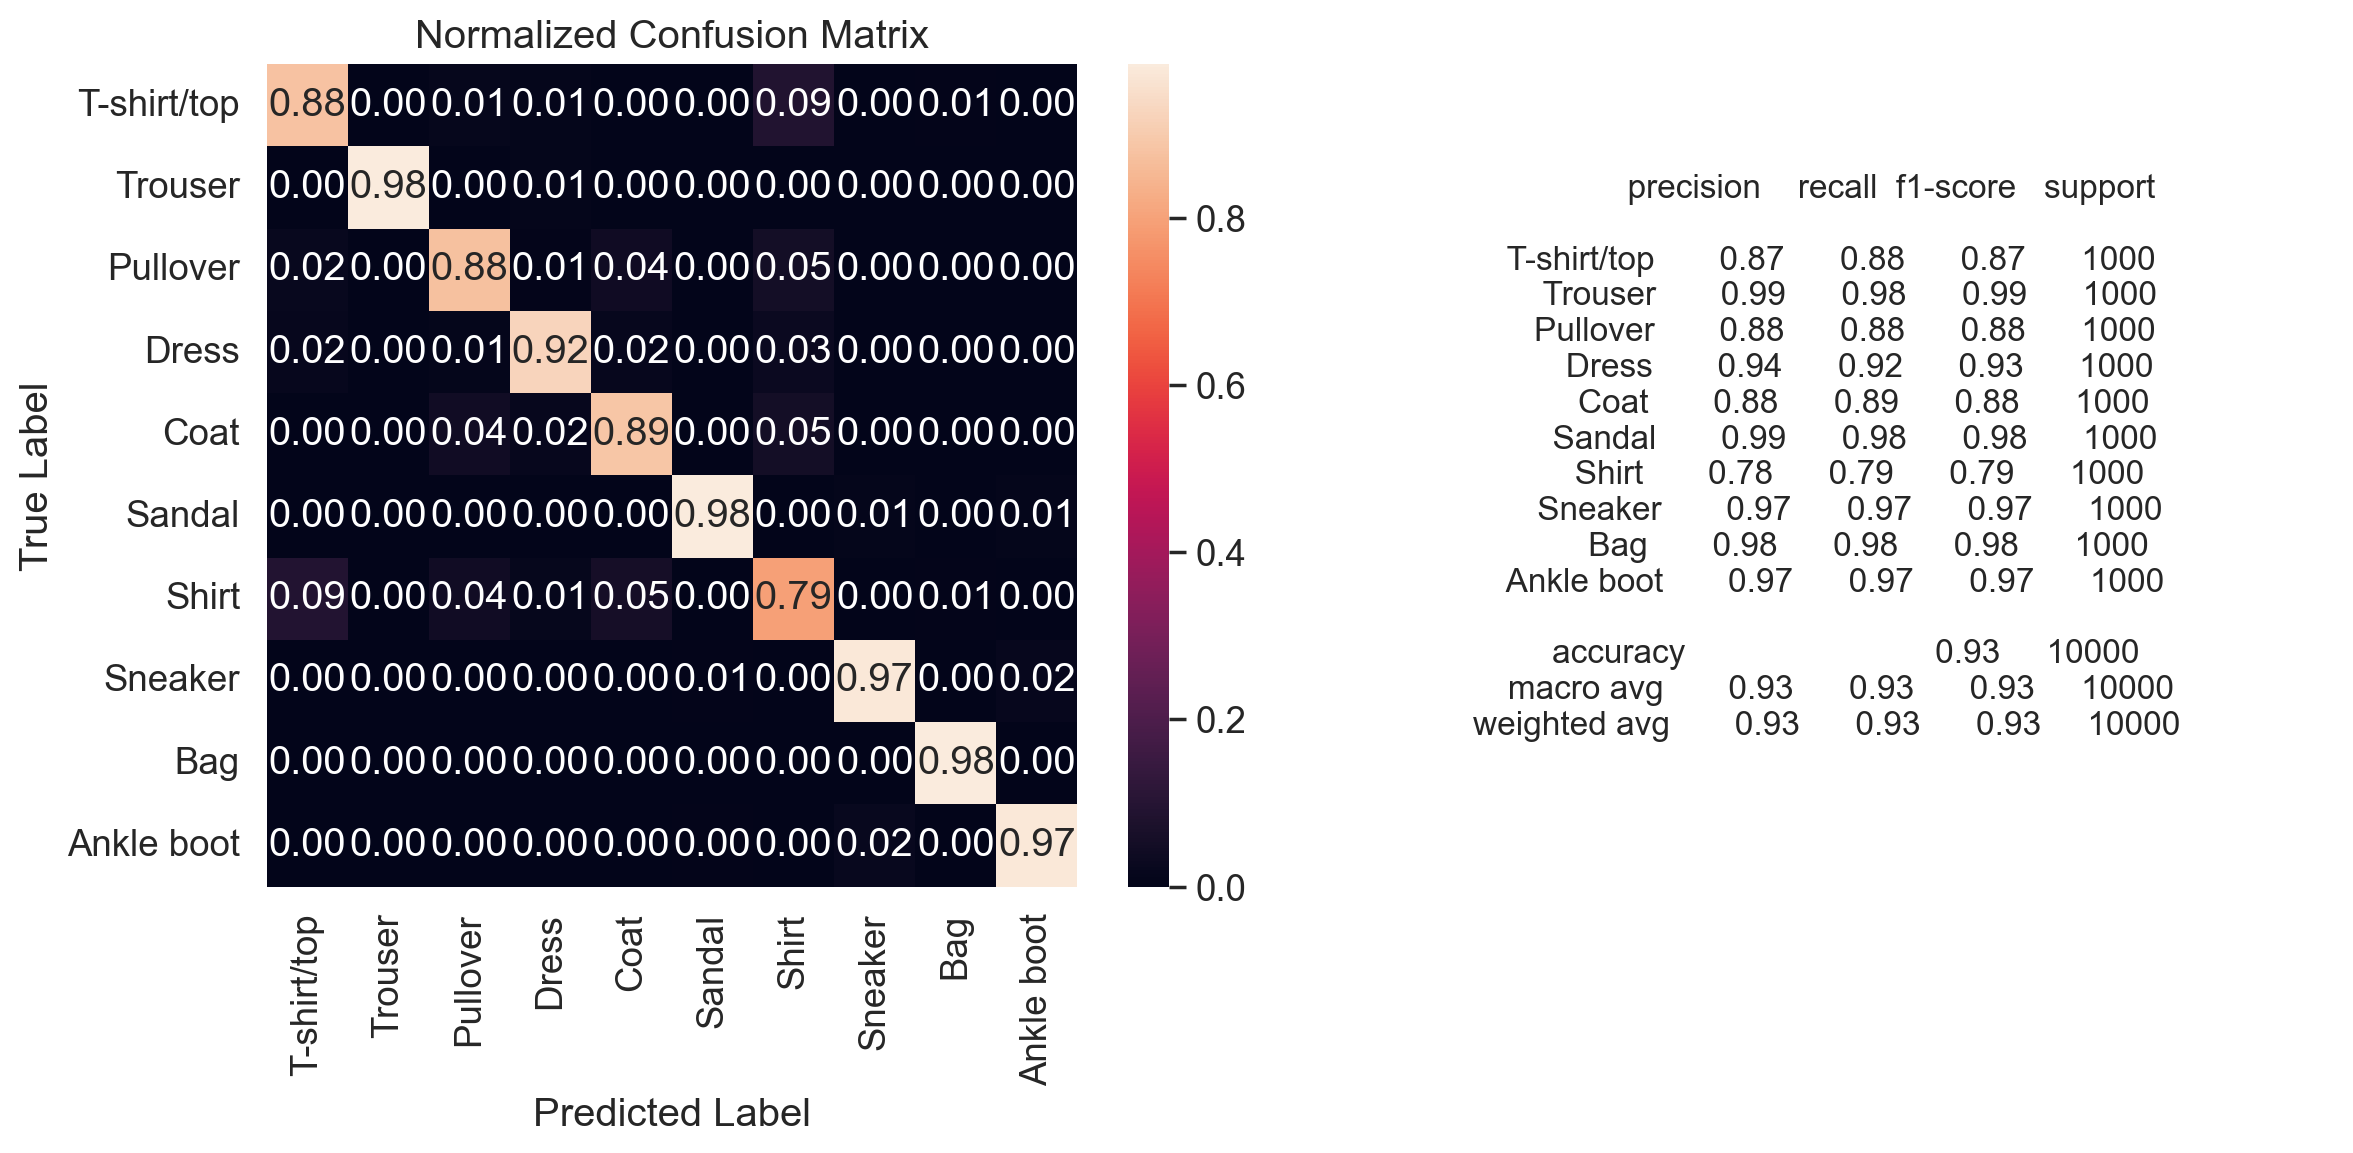

In [ ]:
# Evaluate LR CNN Model
# Predictions for CNN Model with LRS
y_pred_lr = np.argmax(model_cnn_lr.predict(test_images), axis=-1)
confMat_clfReport(test_labels, y_pred_lr, class_names)

## Prediction

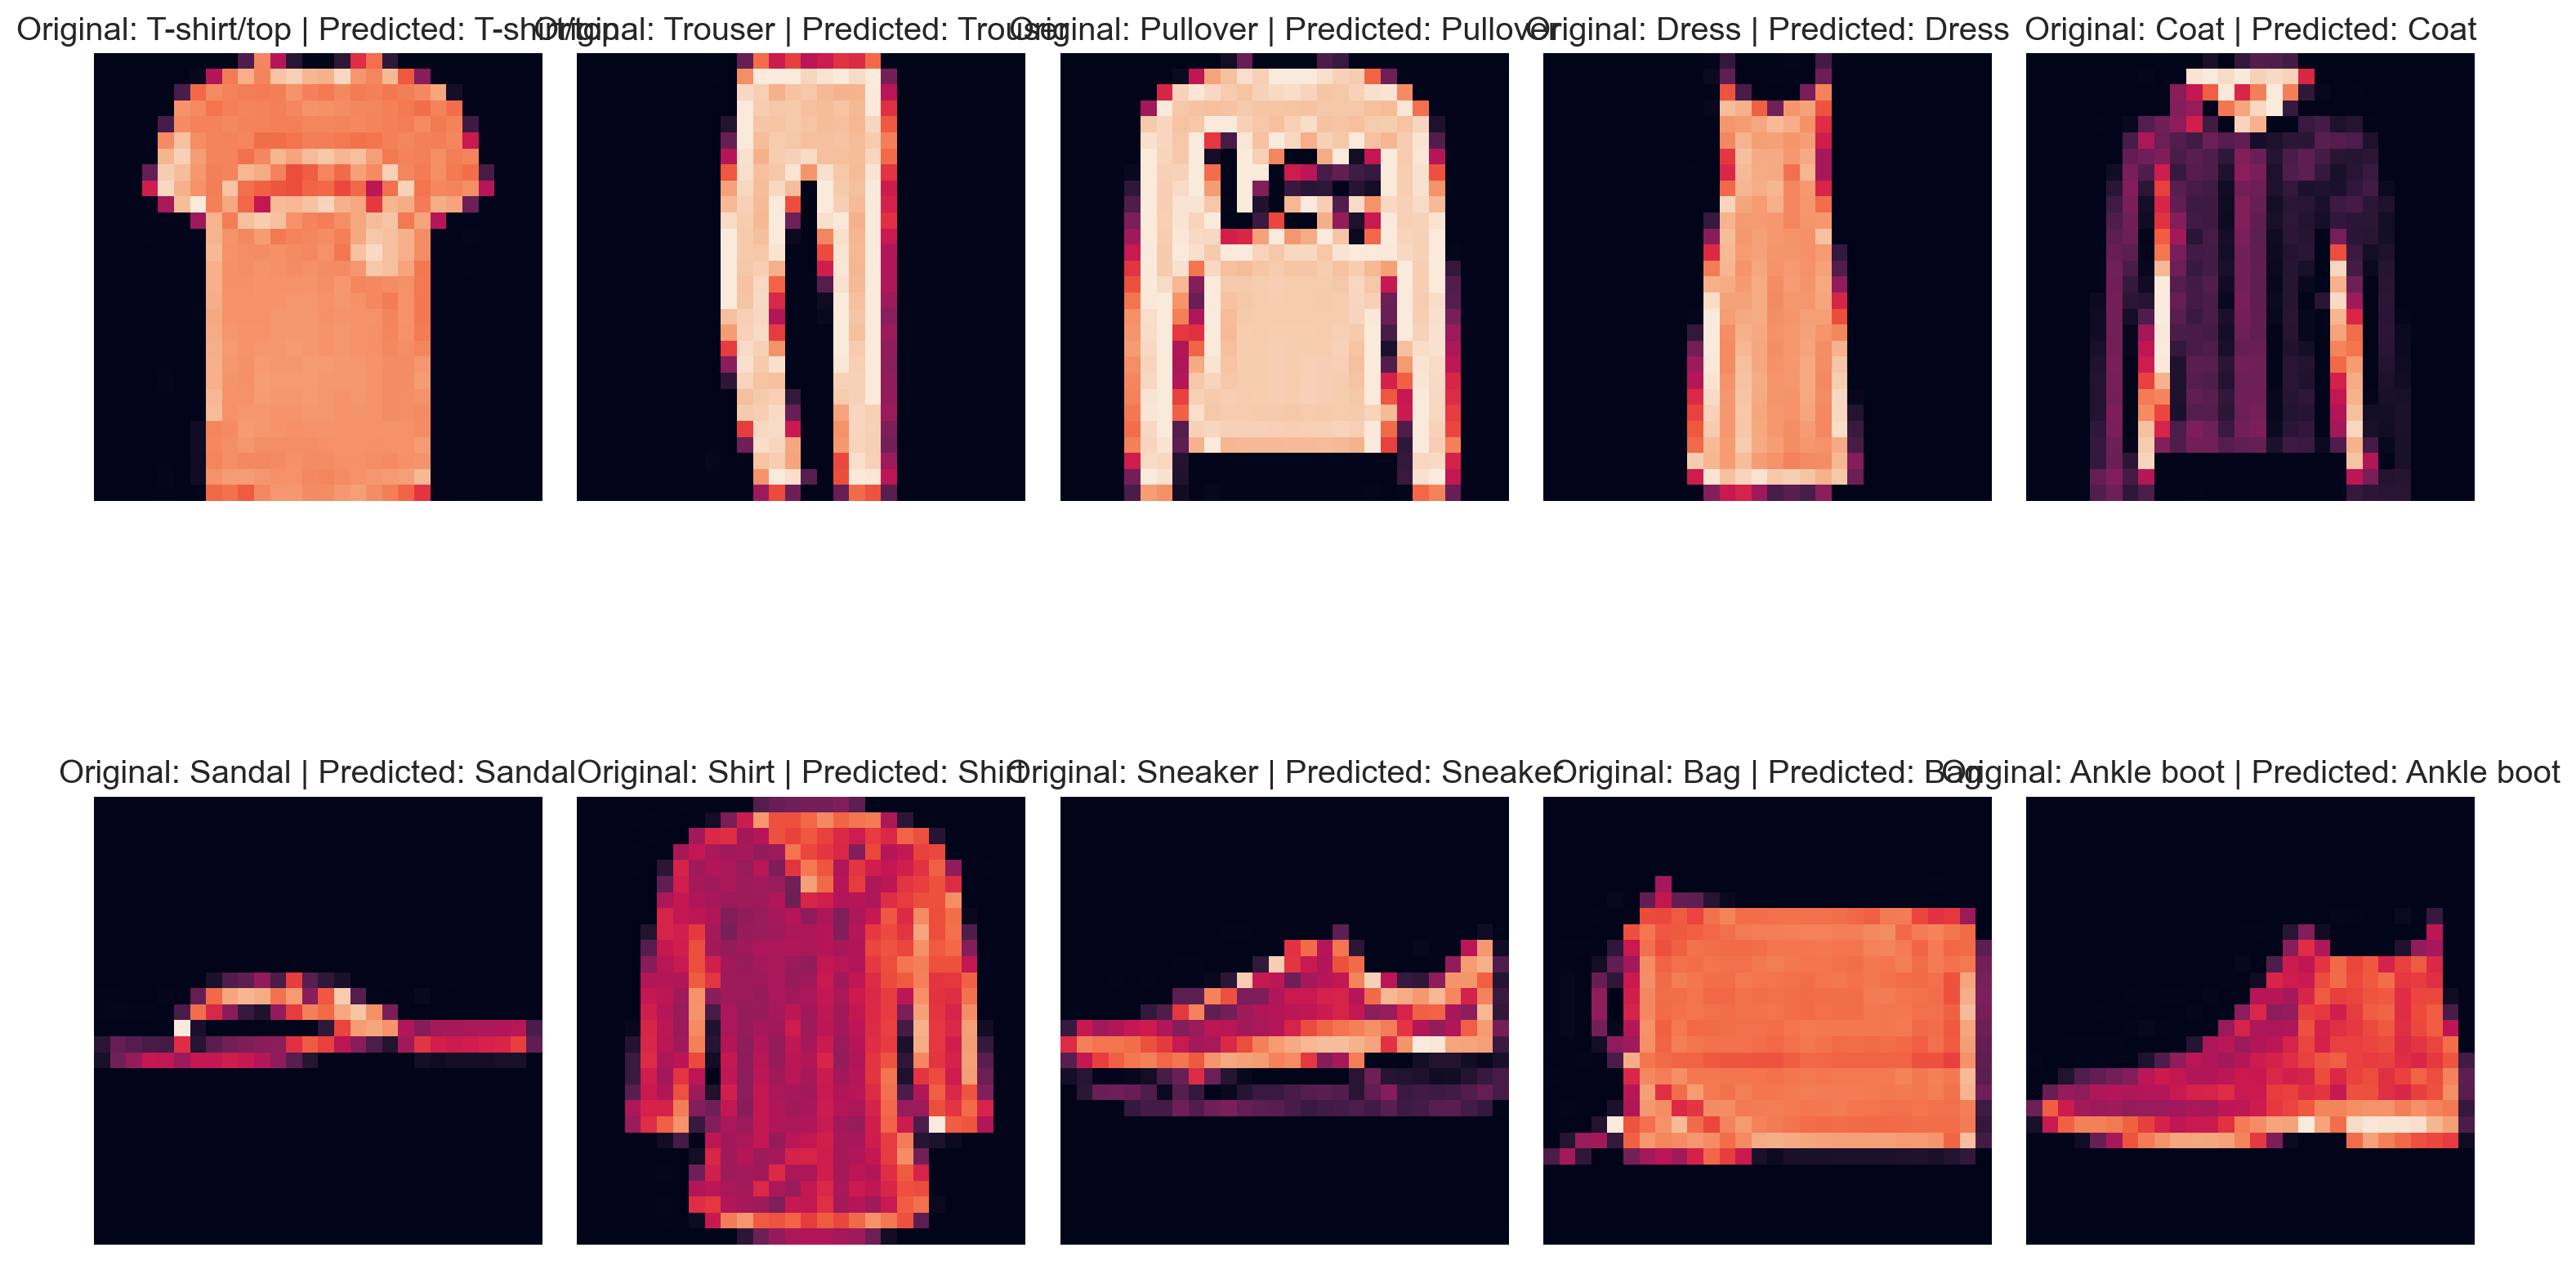

In [ ]:
plt.rcParams['figure.figsize'] = (15,15)
plt.rcParams['figure.dpi'] = 200
# Loop through each unique digit
for i in digits:
    plt.subplot(2, 5, i + 1)  # Create subplot
    test = test_images[test_labels == i][0]  # Select the first image of the current digit
    plt.imshow(test.reshape(28, 28))  # Display the image
    pred = model_cnn_lr.predict(test.reshape(1, 28, 28, 1))  # Make prediction
    idx = np.argmax(pred[0])  # Get the predicted class index
    pred_class = class_names[idx]  # Get the predicted class name
    plt.title('Original: {} | Predicted: {}'.format(class_names[i], pred_class))  # Set title
    plt.axis('off')  # Turn off axis
    plt.tight_layout()  # Adjust layout

plt.show()  # Show the plot


# Batch Normalized CNN Model

In [ ]:
#adding dropout layers and batch normalization

model_dropout_normal = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])


In [ ]:
# Compile the model with appropriate settings
model_dropout_normal.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', # Sparse categorical crossentropy for integer labels
              metrics=['accuracy'])

In [ ]:
# Training the Batch normalized CNN model on the training data that is created.
history_dn=model_dropout_normal.fit(train_images,train_labels,epochs=10,batch_size=32,validation_split=0.2)
history_dn

Epoch 1/10
1500/1500 [==============================] - 28s 18ms/step - loss: 0.6425 - accuracy: 0.7710 - val_loss: 0.4208 - val_accuracy: 0.8501
Epoch 2/10
1500/1500 [==============================] - 27s 18ms/step - loss: 0.4450 - accuracy: 0.8390 - val_loss: 0.3517 - val_accuracy: 0.8725
Epoch 3/10
1500/1500 [==============================] - 28s 19ms/step - loss: 0.3921 - accuracy: 0.8586 - val_loss: 0.2954 - val_accuracy: 0.8882
Epoch 4/10
1500/1500 [==============================] - 27s 18ms/step - loss: 0.3670 - accuracy: 0.8681 - val_loss: 0.3005 - val_accuracy: 0.8859
Epoch 5/10
1500/1500 [==============================] - 27s 18ms/step - loss: 0.3445 - accuracy: 0.8756 - val_loss: 0.3569 - val_accuracy: 0.8725
Epoch 6/10
1500/1500 [==============================] - 28s 18ms/step - loss: 0.3310 - accuracy: 0.8793 - val_loss: 0.2982 - val_accuracy: 0.8905
Epoch 7/10
1500/1500 [==============================] - 27s 18ms/step - loss: 0.3153 - accuracy: 0.8831 - val_loss: 0.2801 -

## Model Evaluation

In [ ]:
# Evaluate the model on the test data
test_loss, test_accuracy = model_dropout_normal.evaluate(test_images, test_labels)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

313/313 [==============================] - 2s 6ms/step - loss: 0.2909 - accuracy: 0.8950
Test Accuracy: 89.50%


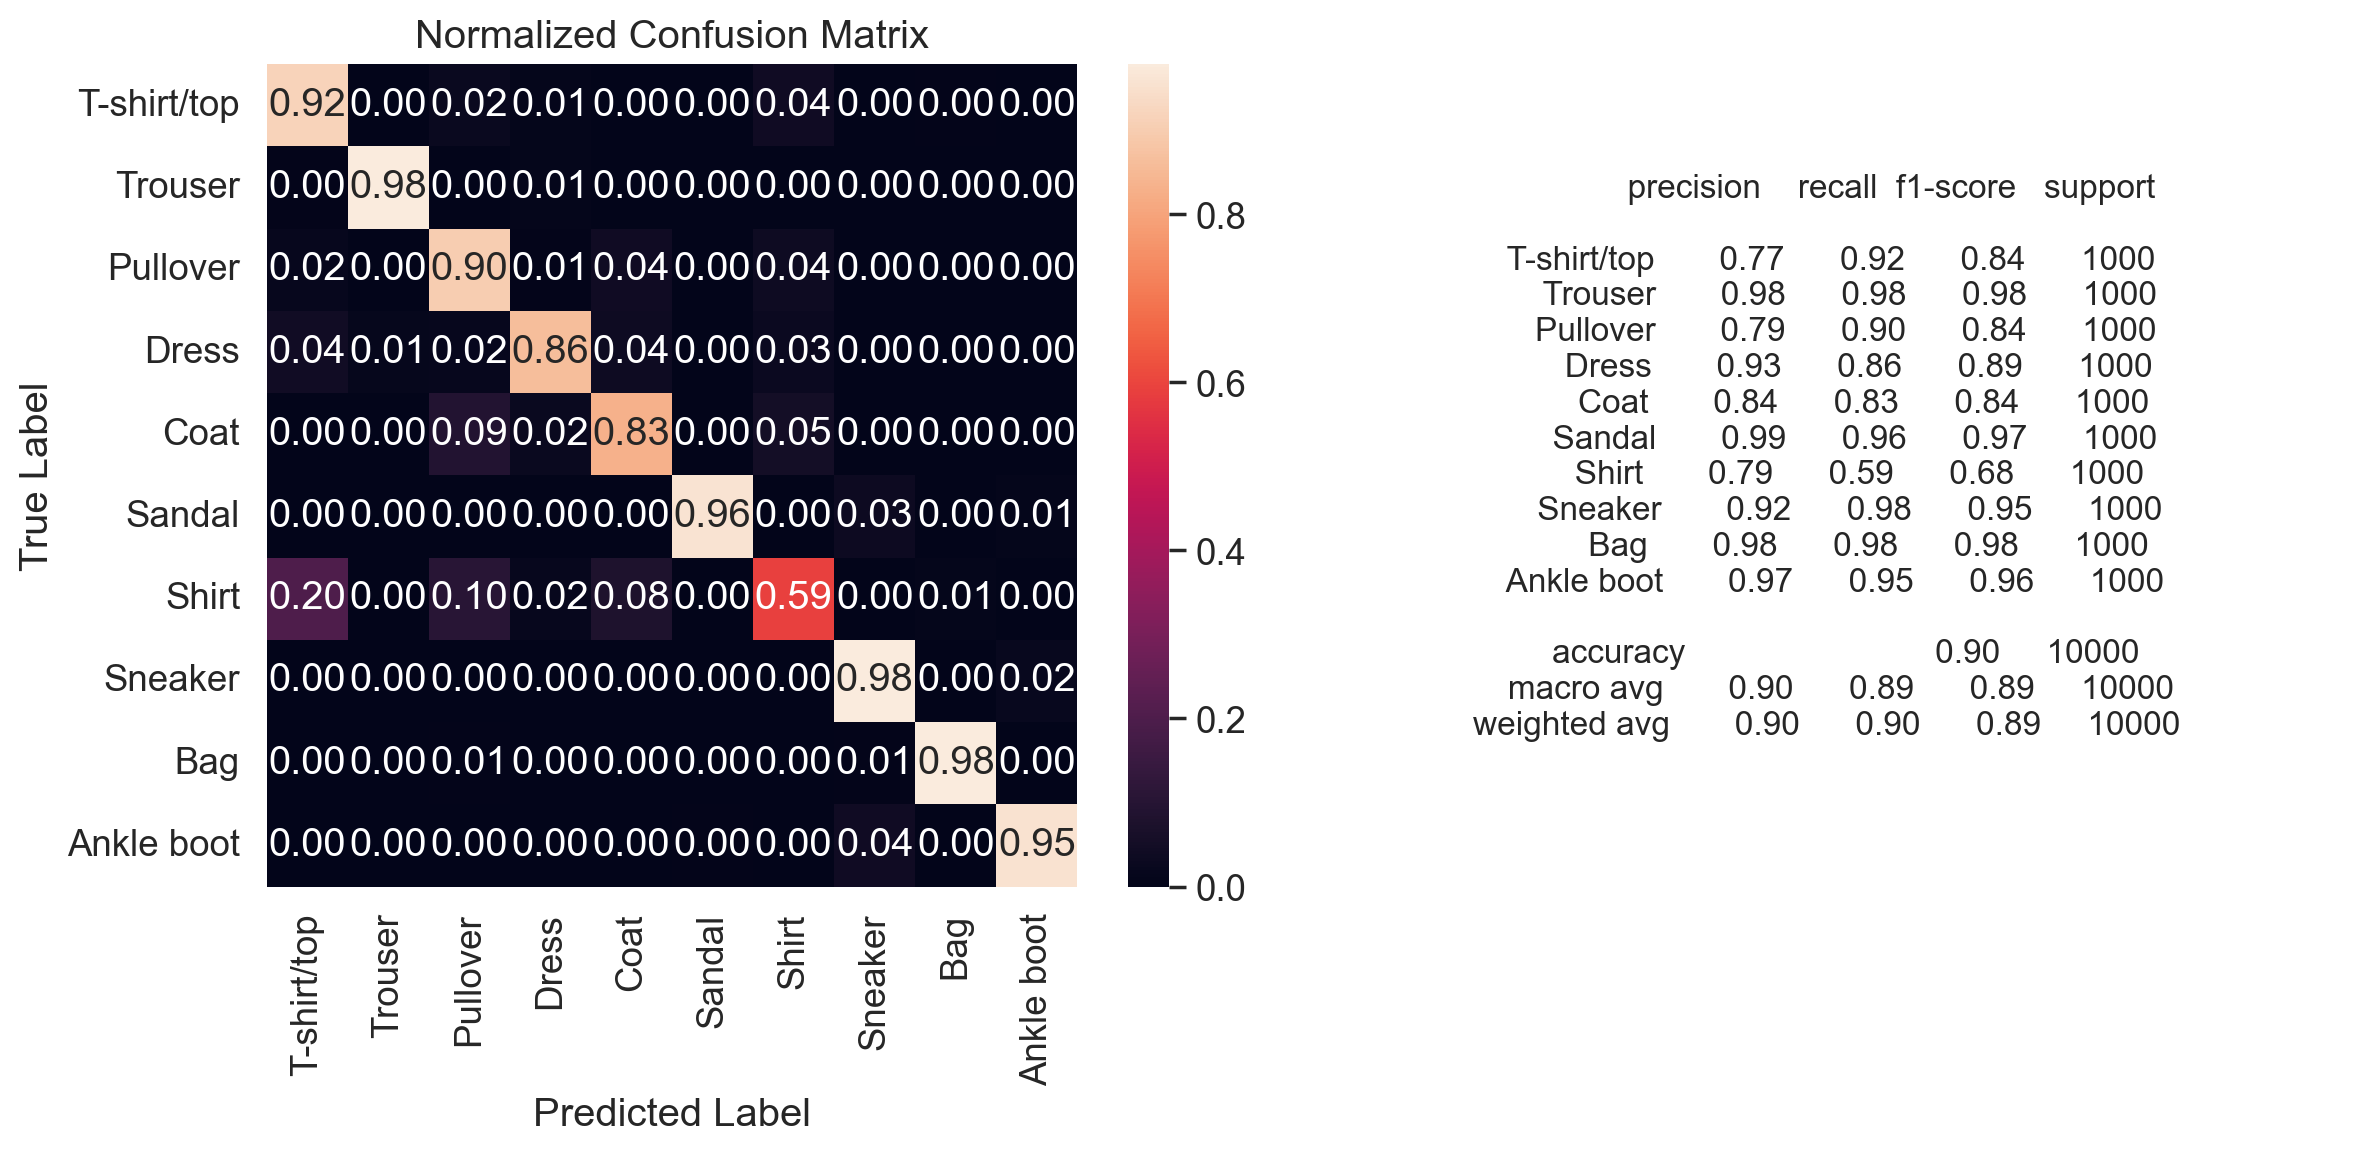

In [ ]:
# Evaluate Normalized CNN Model
# Predictions for CNN Model with Batch normalization and dropout
y_pred_dbn = np.argmax(model_dropout_normal.predict(test_images), axis=-1)
confMat_clfReport(test_labels, y_pred_dbn, class_names)

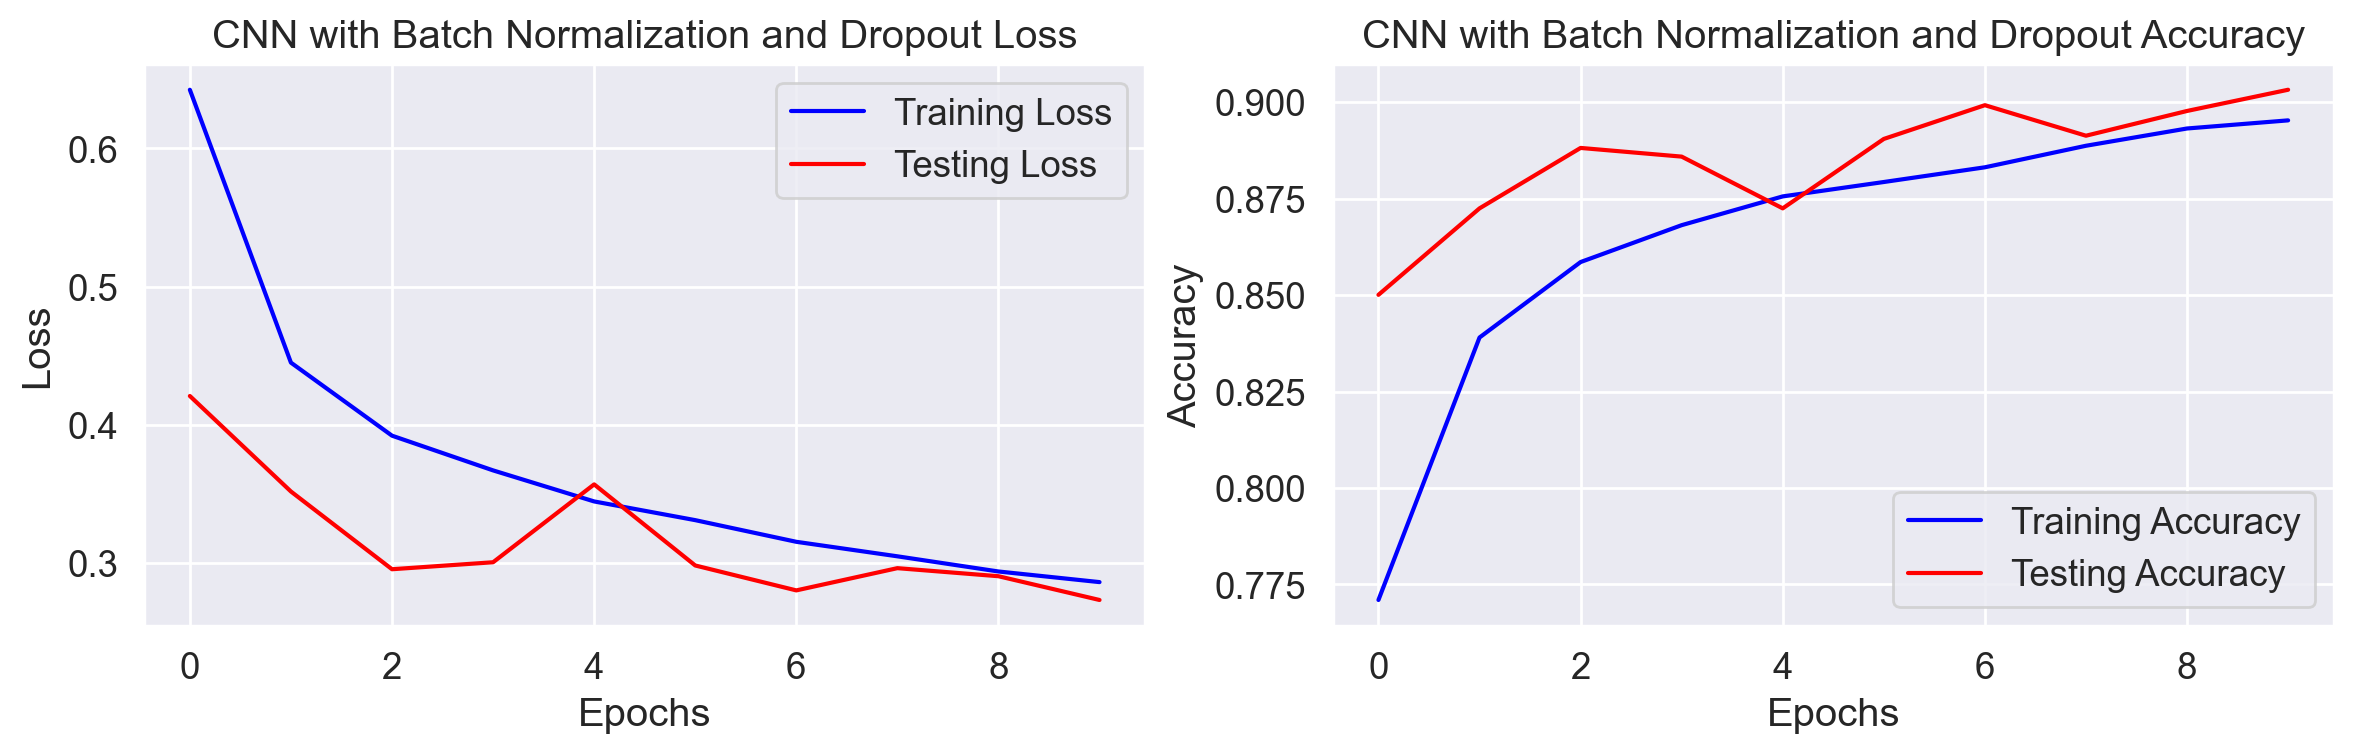

In [ ]:
# Plot metrics for Simple CNN Model
plot_metrics(history_dn, 'CNN with Batch Normalization and Dropout')

## Prediction

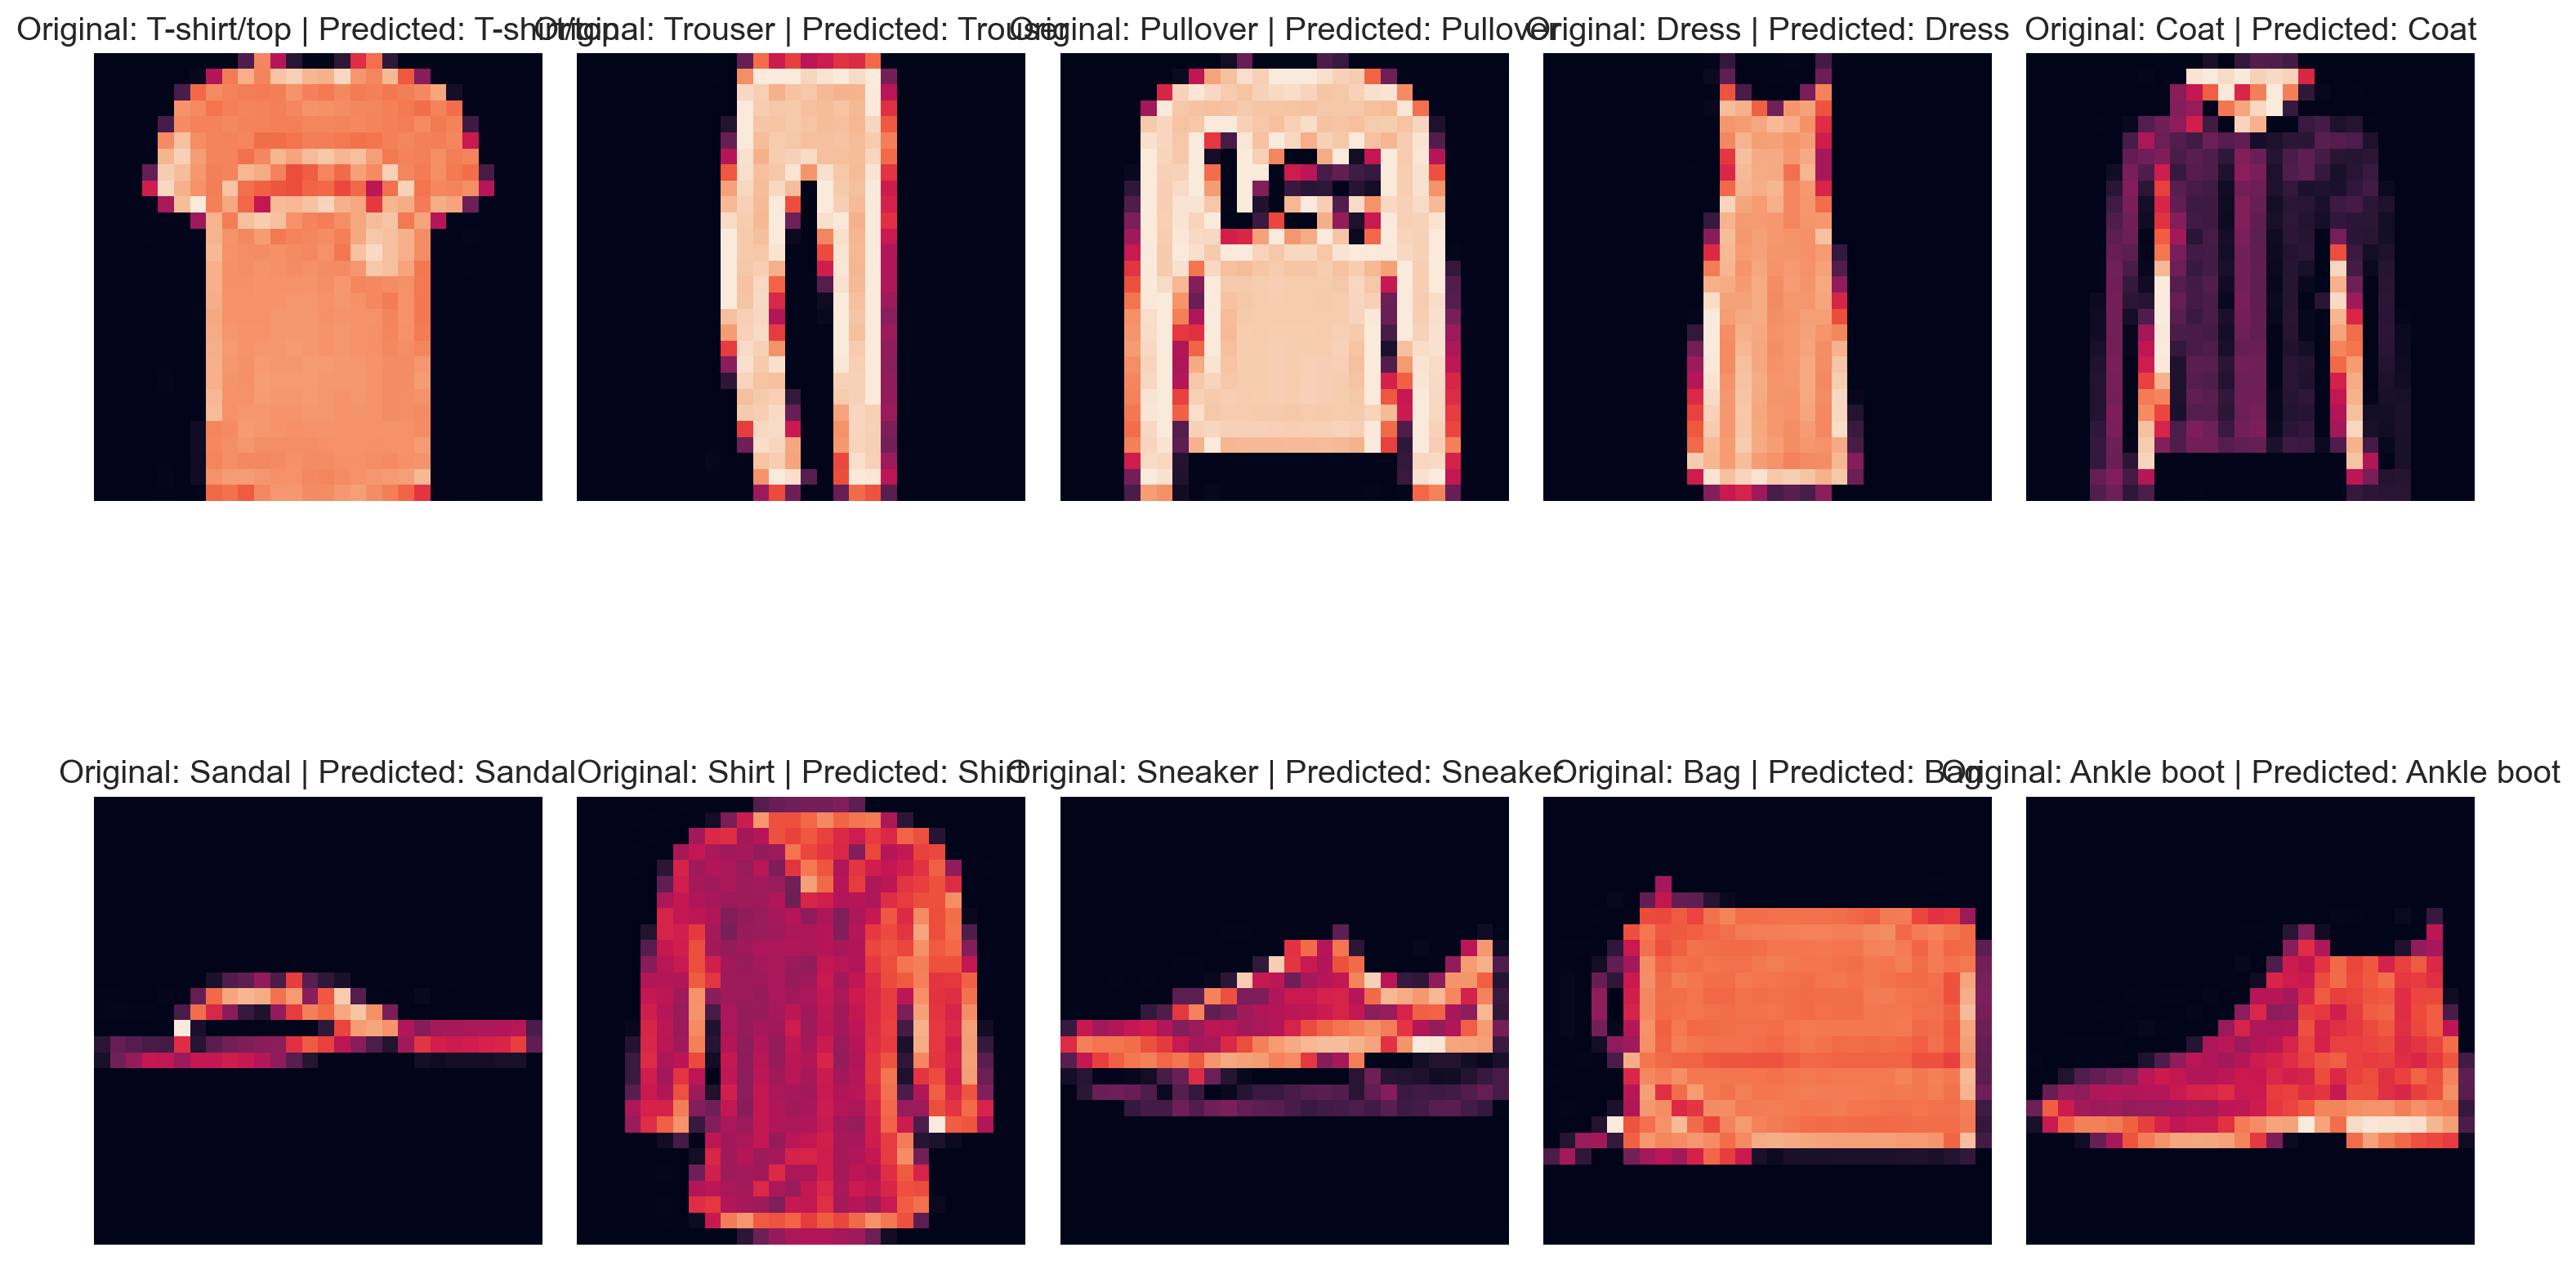

In [ ]:
plt.rcParams['figure.figsize'] = (15,15)
plt.rcParams['figure.dpi'] = 200
# Loop through each unique digit
for i in digits:
    plt.subplot(2, 5, i + 1)  # Create subplot
    test = test_images[test_labels == i][0]  # Select the first image of the current digit
    plt.imshow(test.reshape(28, 28))  # Display the image
    pred = model_dropout_normal.predict(test.reshape(1, 28, 28, 1))  # Make prediction
    idx = np.argmax(pred[0])  # Get the predicted class index
    pred_class = class_names[idx]  # Get the predicted class name
    plt.title('Original: {} | Predicted: {}'.format(class_names[i], pred_class))  # Set title
    plt.axis('off')  # Turn off axis
    plt.tight_layout()  # Adjust layout

plt.show()  # Show the plot

# Data Augmented CNN Model

In [ ]:
# Reshape train_images to include the channel dimension
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)

# Define the model
model_aug = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile the model
model_aug.compile(optimizer=Adam(learning_rate=0.001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# Create ImageDataGenerator with augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

# Fit the ImageDataGenerator
datagen.fit(train_images)

# Train the model with augmented data
history_aug = model_aug.fit(datagen.flow(train_images, train_labels, batch_size=32),
                            steps_per_epoch=int(len(train_images) / 32), epochs=20,
                            validation_data=(test_images, test_labels))


Epoch 1/20
1875/1875 [==============================] - 22s 11ms/step - loss: 0.8315 - accuracy: 0.6909 - val_loss: 0.4961 - val_accuracy: 0.8024
Epoch 2/20
1875/1875 [==============================] - 21s 11ms/step - loss: 0.6416 - accuracy: 0.7591 - val_loss: 0.4473 - val_accuracy: 0.8298
Epoch 3/20
1875/1875 [==============================] - 21s 11ms/step - loss: 0.5999 - accuracy: 0.7756 - val_loss: 0.4271 - val_accuracy: 0.8411
Epoch 4/20
1875/1875 [==============================] - 21s 11ms/step - loss: 0.5761 - accuracy: 0.7853 - val_loss: 0.4201 - val_accuracy: 0.8445
Epoch 5/20
1875/1875 [==============================] - 21s 11ms/step - loss: 0.5566 - accuracy: 0.7932 - val_loss: 0.3845 - val_accuracy: 0.8569
Epoch 6/20
1875/1875 [==============================] - 21s 11ms/step - loss: 0.5377 - accuracy: 0.7997 - val_loss: 0.3739 - val_accuracy: 0.8667
Epoch 7/20
1875/1875 [==============================] - 21s 11ms/step - loss: 0.5299 - accuracy: 0.8015 - val_loss: 0.3875 -

## Model Evaluation

In [ ]:
# Evaluate the model on the test dataset
test_loss, test_accuracy = model_aug.evaluate(test_images, test_labels)
print(f"Test Accuracy: {test_accuracy}")


313/313 [==============================] - 1s 3ms/step - loss: 0.3549 - accuracy: 0.8750
Test Accuracy: 0.875


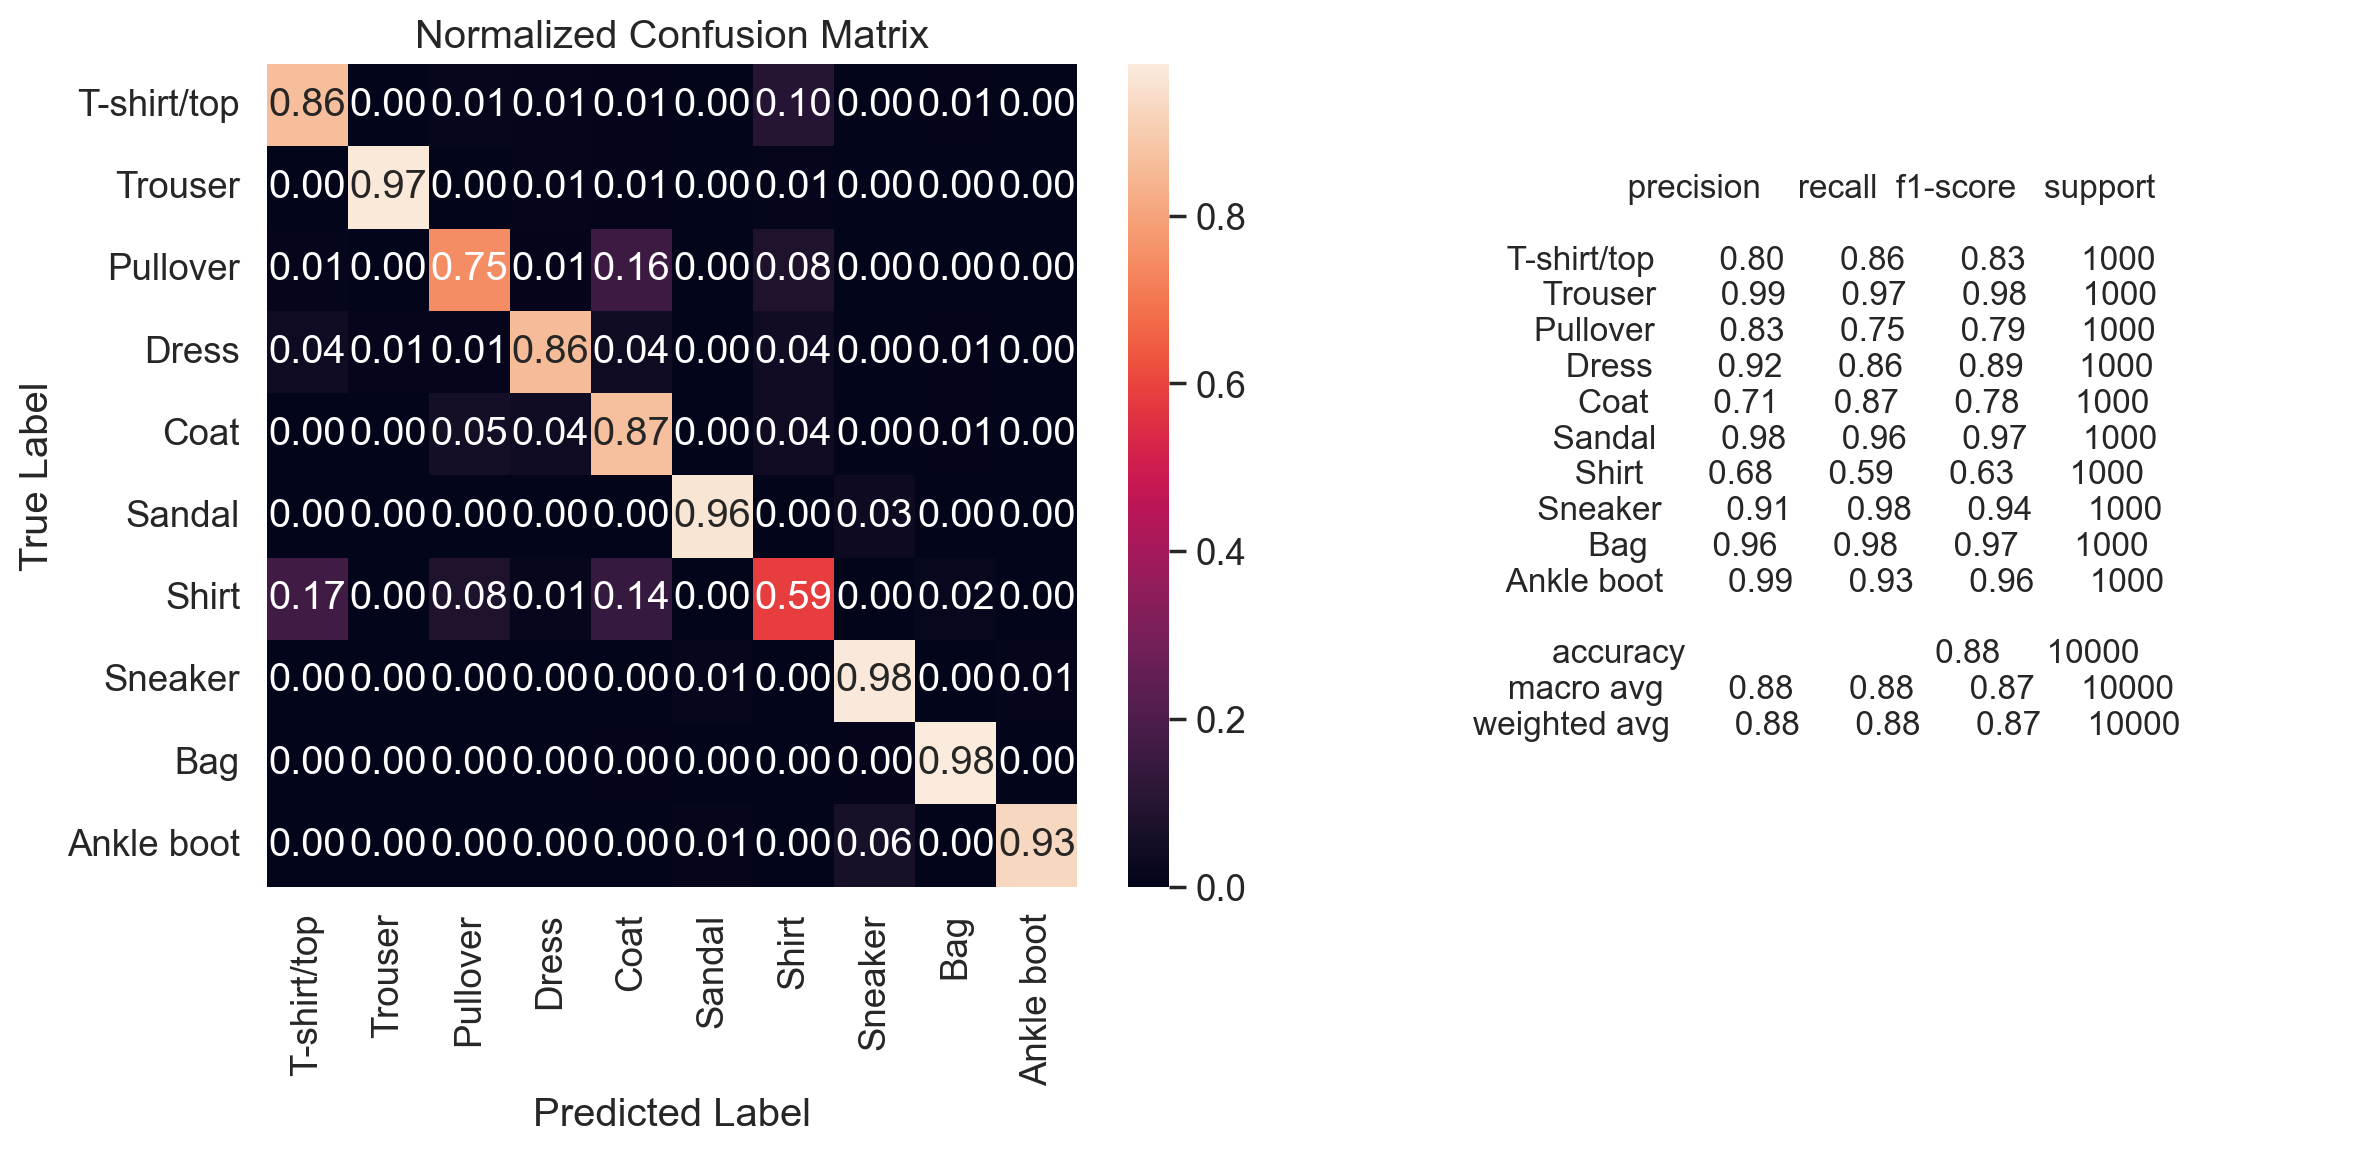

In [ ]:
# Evaluate Simple CNN Model
# Predictions for Simple CNN Model
y_pred_aug = np.argmax(model_aug.predict(test_images), axis=-1)
confMat_clfReport(test_labels, y_pred_aug, class_names)

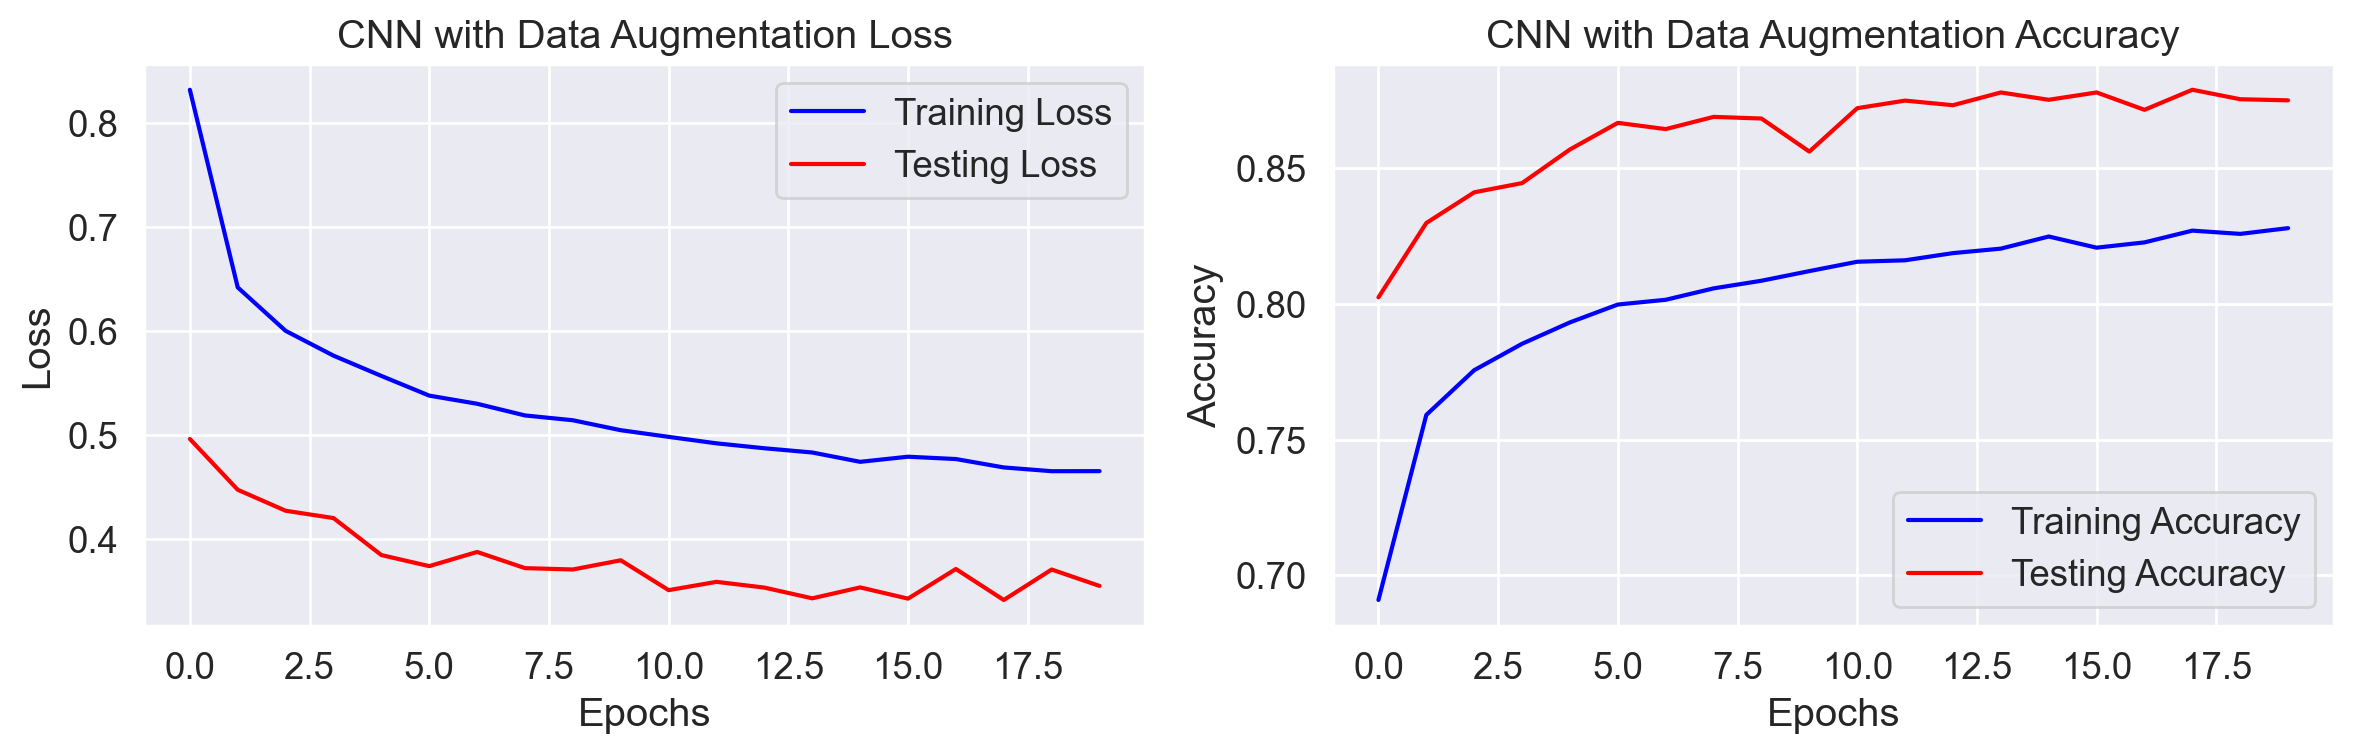

In [ ]:
# Plot metrics for Simple CNN Model
plot_metrics(history_aug, 'CNN with Data Augmentation')

## Prediction

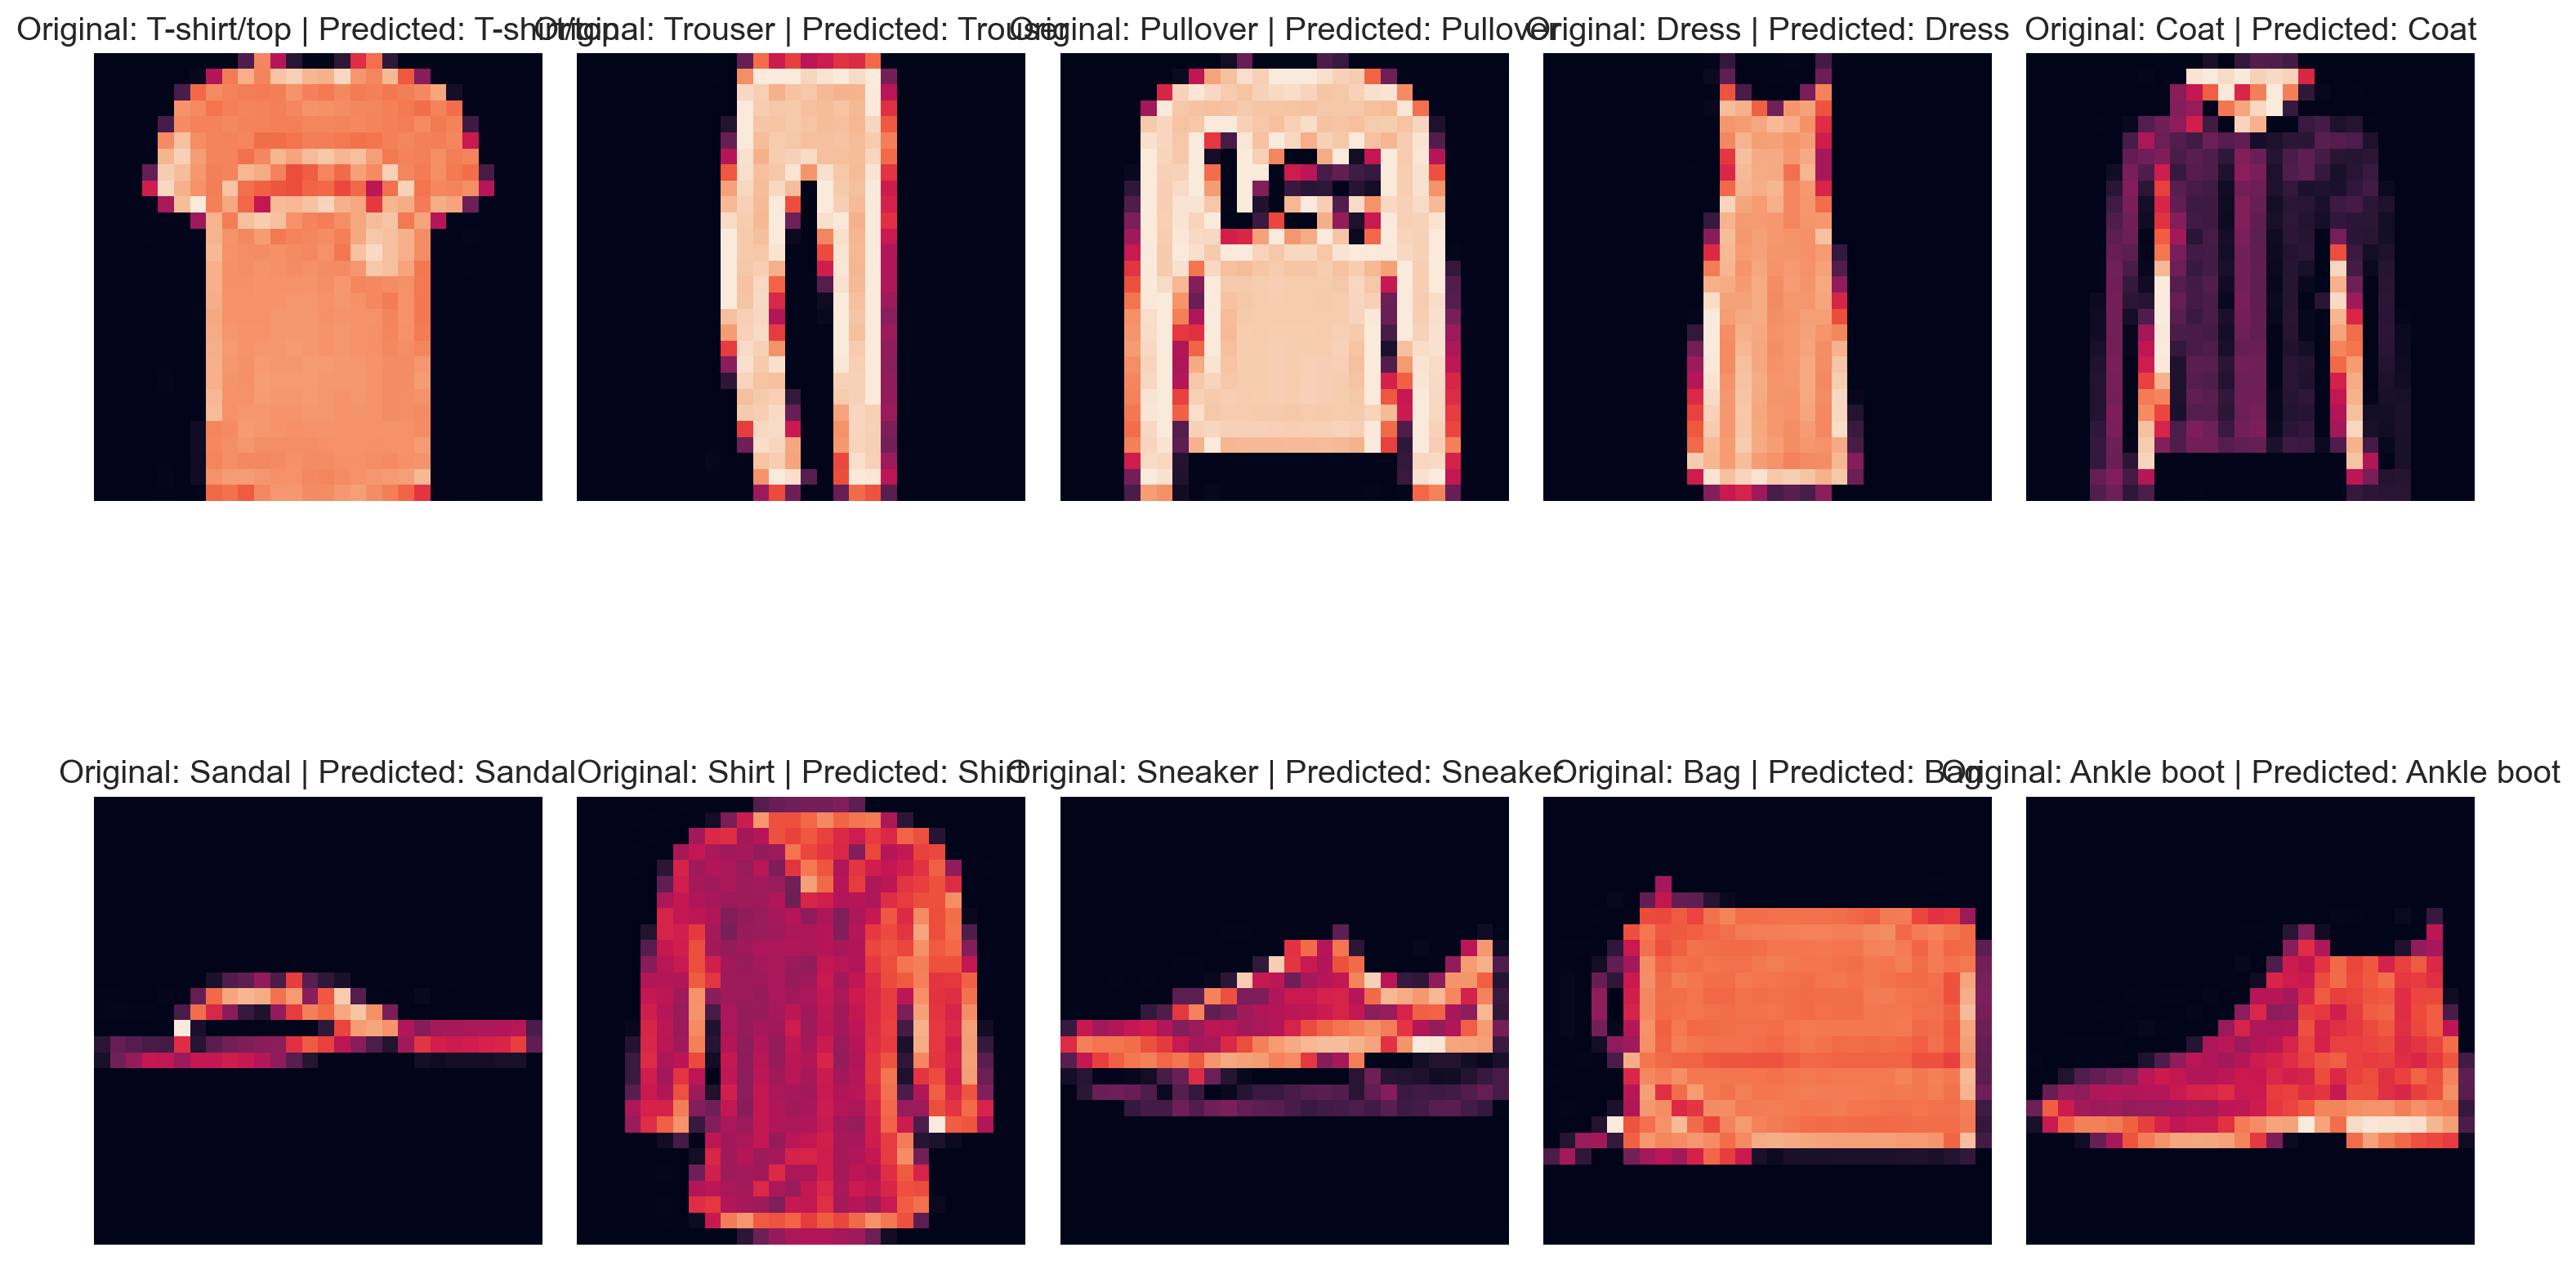

In [ ]:
plt.rcParams['figure.figsize'] = (15,15)
plt.rcParams['figure.dpi'] = 200
# Loop through each unique digit
for i in digits:
    plt.subplot(2, 5, i + 1)  # Create subplot
    test = test_images[test_labels == i][0]  # Select the first image of the current digit
    plt.imshow(test.reshape(28, 28))  # Display the image
    pred = model_aug.predict(test.reshape(1, 28, 28, 1))  # Make prediction
    idx = np.argmax(pred[0])  # Get the predicted class index
    pred_class = class_names[idx]  # Get the predicted class name
    plt.title('Original: {} | Predicted: {}'.format(class_names[i], pred_class))  # Set title
    plt.axis('off')  # Turn off axis
    plt.tight_layout()  # Adjust layout

plt.show()  # Show the plot


# Defining Required Functions for model evaluation

In [ ]:
model_names = [model_cnn_simple, model_cnn_lr, model_dropout_normal, model_aug]

In [ ]:
# Function to generate classification report
def clf_report(model_names, test_images, test_labels):
    """
    Generate and print the classification report for a given model

    Parameters:
    - model_names: Trained model to evaluate
    - test_images: Test images to predict
    - test_labels: True labels for the test images

    Returns:
    - None
    """
    # Predicting labels for test images using the model
    y_pred = np.argmax(model_names.predict(test_images), axis=1)

    # Generating the classification report
    report = classification_report(test_labels, y_pred)
    print("Classification Report:\n", report)

In [ ]:
history=[history_simple_cnn,history_lr,history_dn,history_aug]

In [ ]:
# Function to compute training time
def calc_train_time(history):
    """
    This function computes the number of epochs completed during training,
    the average training accuracy, and the average validation accuracy.

    Parameters:
    - history: Training history object from model training

    Returns:
    - epochs_completed: Number of epochs completed
    - avg_train_accuracy: Average training accuracy
    - avg_val_accuracy: Average validation accuracy
    """
    epochs_completed = history.epoch[-1]
    avg_train_accuracy = np.mean(history.history['accuracy'])
    avg_val_accuracy = np.mean(history.history['val_accuracy'])

    return epochs_completed, avg_train_accuracy, avg_val_accuracy

In [ ]:
# Function to compute training time and metrics
def compute_training_time(history, model_names, time_per_epoch):
    """
    This function calculates the total training time, mean training accuracy,
    and mean validation accuracy based on the training history

    Parameters:
    - history: Training history object from model training
    - model_name: Name of trained model
    - time_per_epoch: Time per epoch

    Returns:
    - df: DataFrame containing training time and accuracy metrics
    """
    epochs = history.epoch[-1]  # Last epoch
    train_accuracy = np.mean(history.history['accuracy'])  # Mean training accuracy
    val_accuracy = np.mean(history.history['val_accuracy'])  # Mean validation accuracy

    # Compute total training time in seconds
    total_time_seconds = epochs * time_per_epoch

    # Create a DataFrame to store the results
    df = pd.DataFrame({
        'Model': [model_names],
        'Training Time (Epochs)': [epochs],
        'Total Training Time (Seconds)': [total_time_seconds],
        'Training Accuracy': [train_accuracy],
        'Testing Accuracy': [val_accuracy]
    })

    return df


In [ ]:
# Function to compute sensitivity and specificity
def calc_sens_spec(true_labels, pred_labels):
    """
    This function computes the sensitivity and specificity based on
    the true labels and predicted labels.

    Parameters:
    - true_labels: True labels
    - pred_labels: Predicted labels

    Returns:
    - sensitivity: Sensitivity
    - specificity: Specificity
    """

    # Compute the confusion matrix
    cm = confusion_matrix(true_labels, pred_labels)

    # Calculate sensitivity
    sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])

    # Calculate specificity
    specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])

    return sensitivity, specificity

In [ ]:
# Function to generate predictions for each model
def get_predictions_df(model_names, test_data):
    """
    This function generates a DataFrame containing predictions for each model
    based on the provided test data.

    Parameters:
    - model_names: List of model names
    - test_data: Test data for prediction

    Returns:
    - df: DataFrame containing predictions for each model
    """
    predictions = {}

    for model_name in model_names:
        # Get the model
        model = globals()[model_name]

        # Predict labels for the test set
        y_pred = model.predict(test_data)

        # Convert predicted probabilities to class labels
        y_pred = np.argmax(y_pred, axis=1)

        # Store the predictions
        predictions[model_name] = y_pred

    # Create a DataFrame from the predictions dictionary
    df = pd.DataFrame(predictions)

    return df

In [ ]:
def plot_test_accuracy(accuracies, model_names):
    """
    This function plots the test accuracy of multiple models on a single graph.

    Parameters:
    - accuracies: List of test accuracies for each model
    - model_names: List of names for each model

    Returns:
    - None
    """

    plt.figure(figsize=(10, 6))

    # Convert accuracies to percentages
    accuracies = [accuracy * 100 for accuracy in accuracies]

    # Plotting test accuracy for each model
    plt.bar(model_names, accuracies, color='blue')

    plt.xlabel('Models')
    plt.ylabel('Test Accuracy (%)')
    plt.title('Test Accuracy of Different Models')
    plt.ylim(0, 100)
    plt.tight_layout()
    plt.show()


In [ ]:
# Function for plotting confusion matrices for a list of models
def plot_confusion_matrices(model_names, test_images, test_labels, figsize=(15, 12)):
    """
    This function plots the confusion matrices for each model in the provided list
    based on the predictions on the test data.

    Parameters:
    - model_names: List of model objects
    - test_images: Test images to predict
    - test_labels: True labels for the test images
    - figsize: Figure size for the plots

    Returns:
    - None
    """
    if not all(isinstance(model, tf.keras.Model) for model in model_names):
        raise ValueError("All elements in model_names should be Keras model objects.")

    plt.figure(figsize=figsize)

    for idx, model in enumerate(model_names, 1):
        plt.subplot(2, 2, idx)

        # Predict the labels
        y_pred = np.argmax(model.predict(test_images), axis=1)

        # Compute confusion matrix
        cm = confusion_matrix(test_labels, y_pred)

        # Plot confusion matrix
        sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)
        plt.xlabel('Predicted labels')
        plt.ylabel('True labels')
        plt.title(f'Confusion Matrix - {type(model).__name__}')

    plt.tight_layout()
    plt.show()

In [ ]:
# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.

    Parameters:
    - y_true: True labels
    - y_pred: Predicted labels
    - classes: Class labels
    - normalize: to normalize the confusion matrix
    - cmap: Colormap for the heatmap

    Returns:
    - None
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Plot
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, cbar=True)

    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(title)
    plt.xticks(np.arange(len(classes))+0.5, classes, rotation=45)
    plt.yticks(np.arange(len(classes))+0.5, classes)
    plt.tight_layout()
    plt.show()

# Comparative Analysis

In [ ]:
model_name_str = ['model_cnn_simple', 'model_cnn_lr', 'model_dropout_normal', 'model_aug']

# Get predictions DataFrame
df_predictions = get_predictions_df(model_name_str, test_images)

# Get predictions for each model
y_pred_simple_cnn = df_predictions['model_cnn_simple'].values
y_pred_lr = df_predictions['model_cnn_lr'].values
y_pred_dn = df_predictions['model_dropout_normal'].values
y_pred_aug = df_predictions['model_aug'].values

# Compute sensitivity and specificity for each model
sensitivity_simple_cnn, specificity_simple_cnn = calc_sens_spec(test_labels, y_pred_simple_cnn)
sensitivity_lr, specificity_lr = calc_sens_spec(test_labels, y_pred_lr)
sensitivity_dn, specificity_dn = calc_sens_spec(test_labels, y_pred_dn)
sensitivity_aug, specificity_aug = calc_sens_spec(test_labels, y_pred_aug)

# Create DataFrames for each model's metrics
df_cnn = compute_training_time(history_simple_cnn, 'Simple CNN', 9)
df_cnn['Sensitivity'] = sensitivity_simple_cnn
df_cnn['Specificity'] = specificity_simple_cnn

df_lr_schedule = compute_training_time(history_lr, 'CNN with Learning Rate Scheduling', 19)
df_lr_schedule['Sensitivity'] = sensitivity_lr
df_lr_schedule['Specificity'] = specificity_lr

df_bn_dropout = compute_training_time(history_dn, 'CNN with BatchNorm and Dropout', 9)
df_bn_dropout['Sensitivity'] = sensitivity_dn
df_bn_dropout['Specificity'] = specificity_dn

df_data_aug = compute_training_time(history_aug, 'CNN with Data Augmentation', 19)
df_data_aug['Sensitivity'] = sensitivity_aug
df_data_aug['Specificity'] = specificity_aug

# Concatenate all DataFrames
df_results = pd.concat([df_cnn, df_lr_schedule, df_bn_dropout, df_data_aug], ignore_index=True)

# Display the results DataFrame
display(df_results)


,Model,Training Time (Epochs),Total Training Time (Seconds),Training Accuracy,Testing Accuracy,Sensitivity,Specificity
0,Simple CNN,9,81,0.934100,0.908567,1.000000,0.996926
1,CNN with Learning Rate Scheduling,19,361,0.966993,0.917920,1.000000,1.000000
2,CNN with BatchNorm and Dropout,9,81,0.865206,0.885125,0.998911,0.995931
3,CNN with Data Augmentation,19,361,0.802546,0.862555,1.000000,0.997945


In [ ]:
# Displaying the results without training time and epoch columns
df_results.drop(columns=["Total Training Time (Seconds)","Training Time (Epochs)"])

,Model,Training Accuracy,Testing Accuracy,Sensitivity,Specificity
0,Simple CNN,0.934100,0.908567,1.000000,0.996926
1,CNN with Learning Rate Scheduling,0.966993,0.917920,1.000000,1.000000
2,CNN with BatchNorm and Dropout,0.865206,0.885125,0.998911,0.995931
3,CNN with Data Augmentation,0.802546,0.862555,1.000000,0.997945


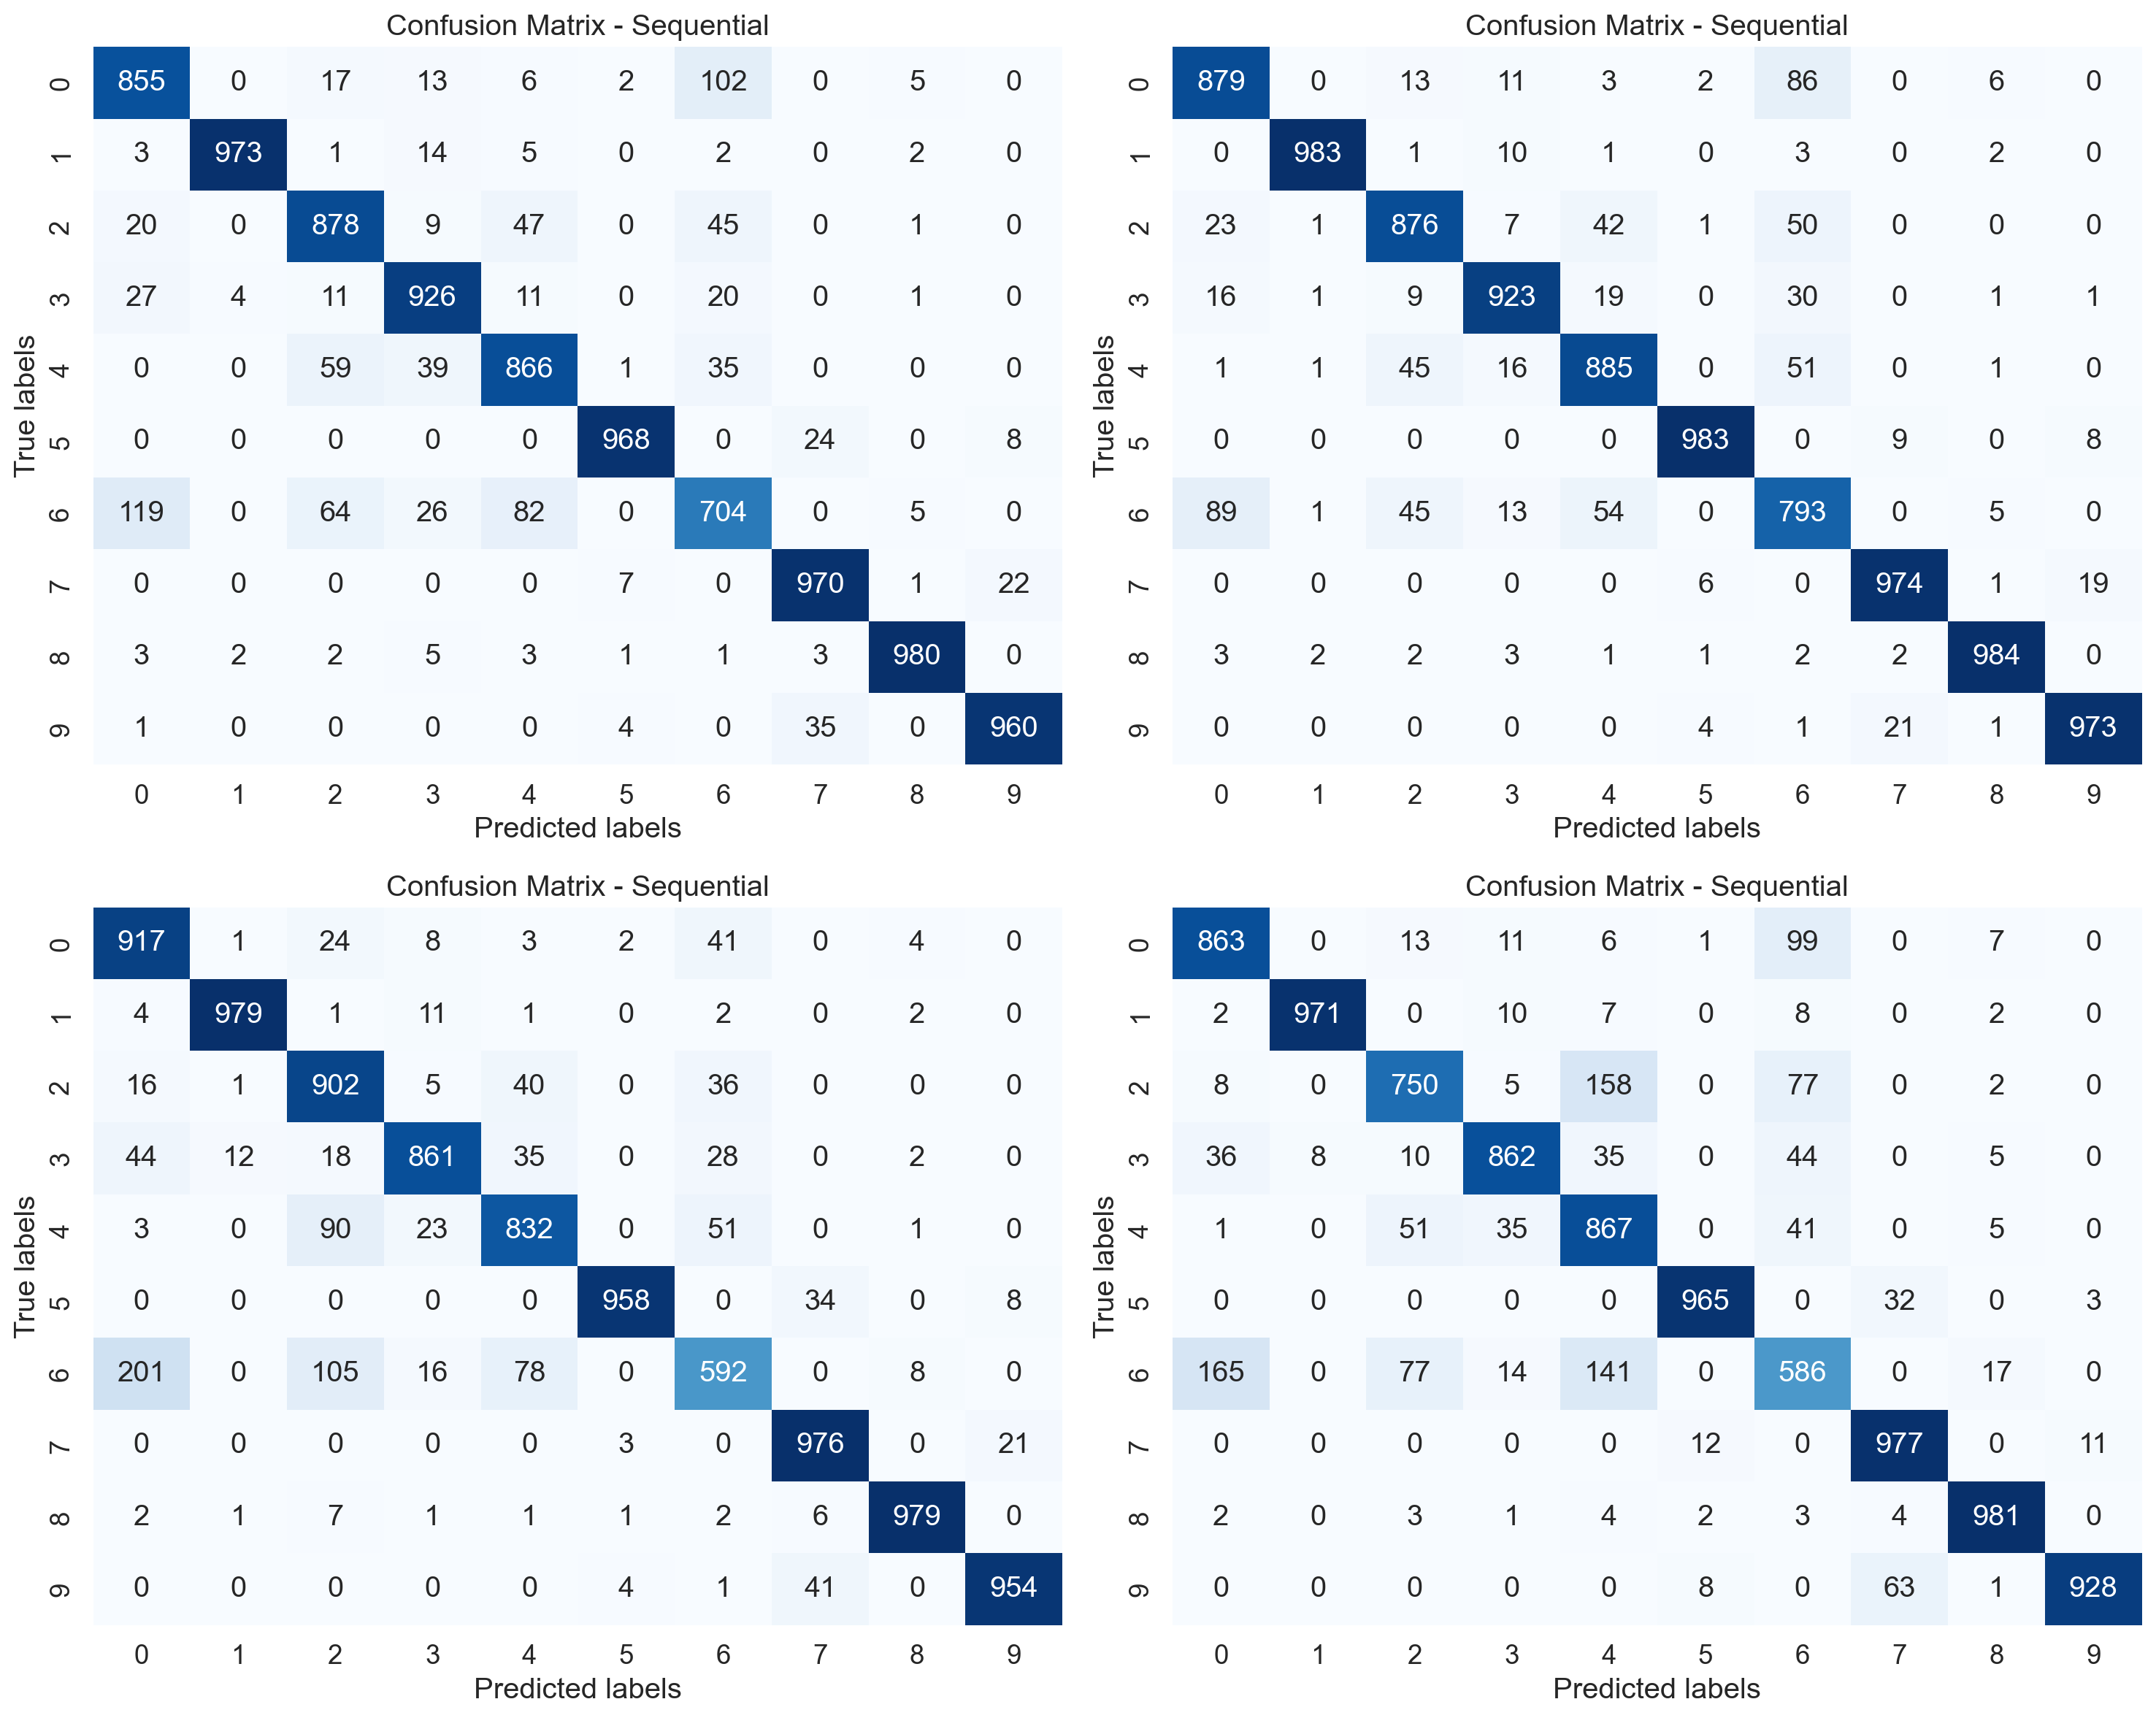

In [ ]:
# Plot confusion matrix of all the four models
plot_confusion_matrices(model_names, test_images, test_labels)